In [32]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import glob
from tqdm import tqdm

In [33]:

def readFiles():
    fileDic = {}
    files = [file for file in glob.glob('*.pkl')]
    for name in tqdm(files):
        file = pickle.load(open(name, 'rb'), encoding = 'latin1')
        fileDic[name.split('.')[0]] = file
    return fileDic

In [34]:
fileDic = readFiles()

100%|██████████████████████████████████████████| 15/15 [03:18<00:00, 13.07s/it]


In [12]:
axes = coordinates[0]

In [43]:
def dist_plot(signal = 'None', signal2 = 'None', signal3 = 'None', title = 'None'):
    """
    @signal: str, indicates the features choose from [signal] 
    @signal2: str, indicates the device, choose from [chest, wrist]
    @signal3: str, indicates the sensor data, choose from name of sensors
    @does: plot the distributions of the features
    @returns: plots
    """
    keys = list(fileDic.keys())
    coordinates = [[i,j] for i in range(5) for j in range(3)]
    fig, axs = plt.subplots(5, 3, figsize = (10,12), dpi =300)
    st = fig.suptitle(title, fontsize="x-large")
    st.set_y(1.03)
    fig.subplots_adjust(top=0.85)

    for key, axes in zip(keys, coordinates):
        sns.distplot(fileDic[key][signal][signal2][signal3], bins = 50, ax = axs[axes[0], axes[1]])
        axs[axes[0], axes[1]].set_title(key , fontsize =14)
        #axs[axes[0], axes[1]].set_xlim(-2,2)

    fig.tight_layout()

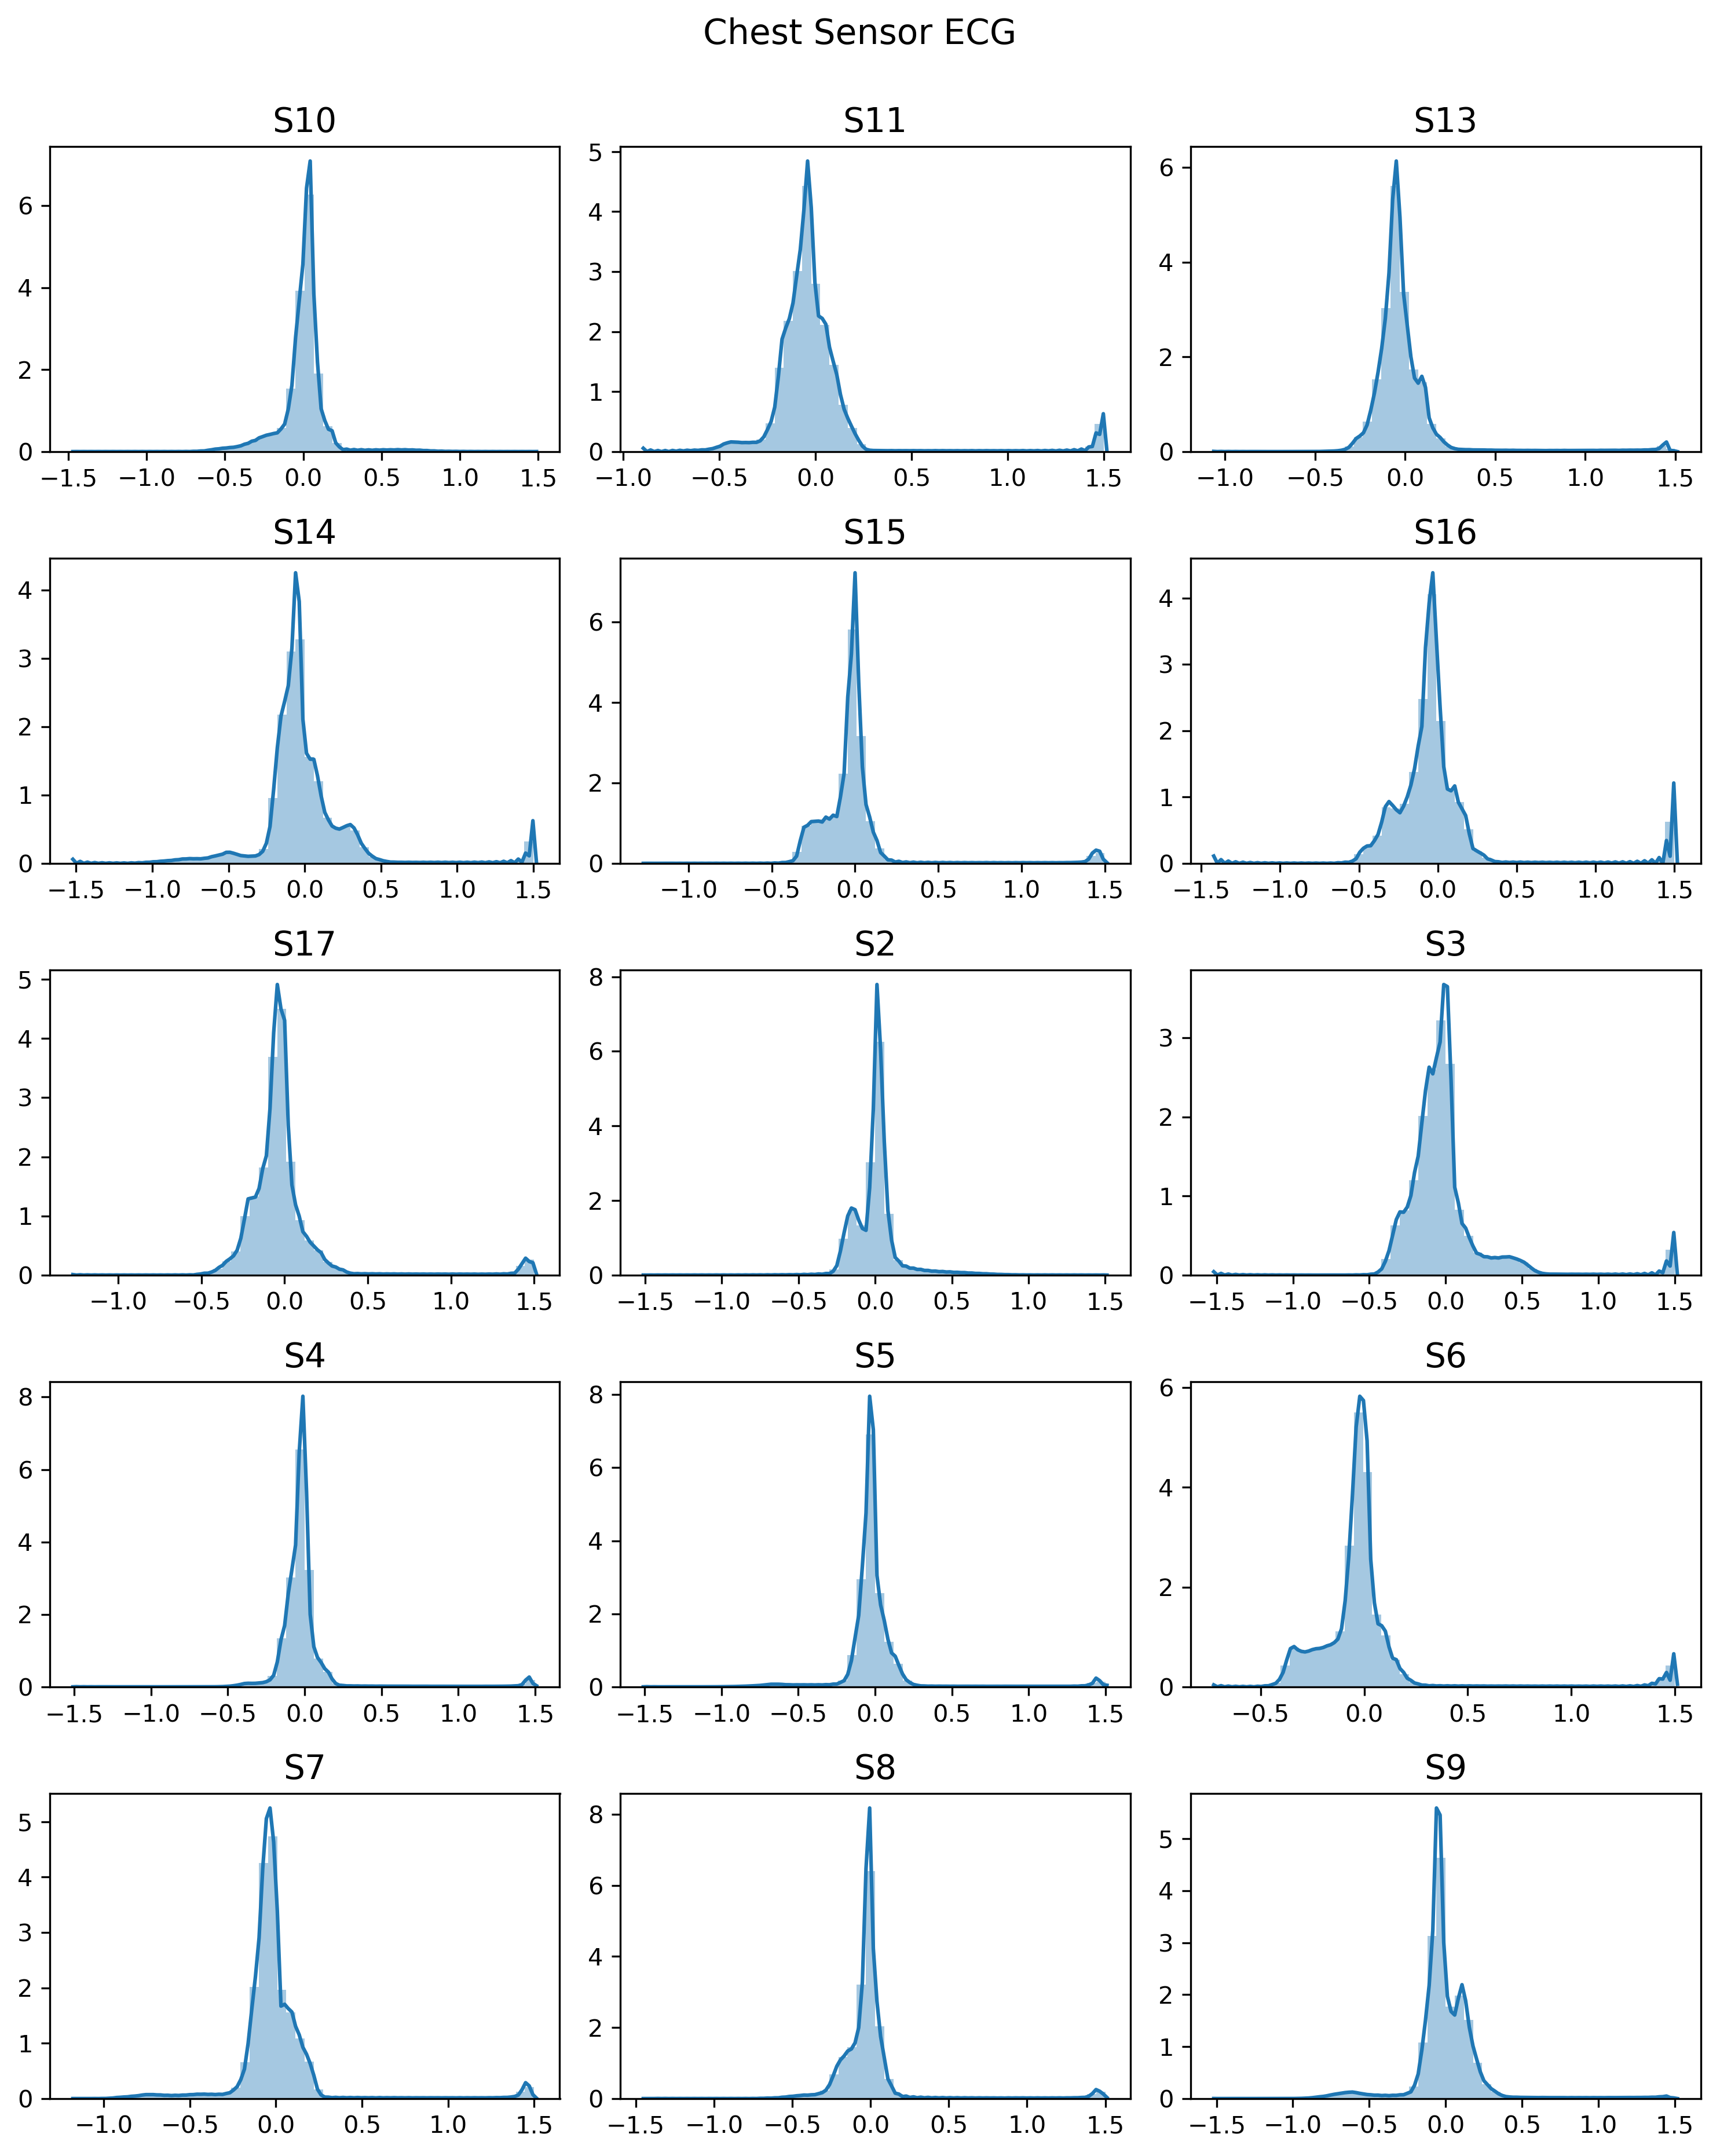

In [25]:
dist_plot('signal','chest', 'ECG', 'Chest Sensor ECG')

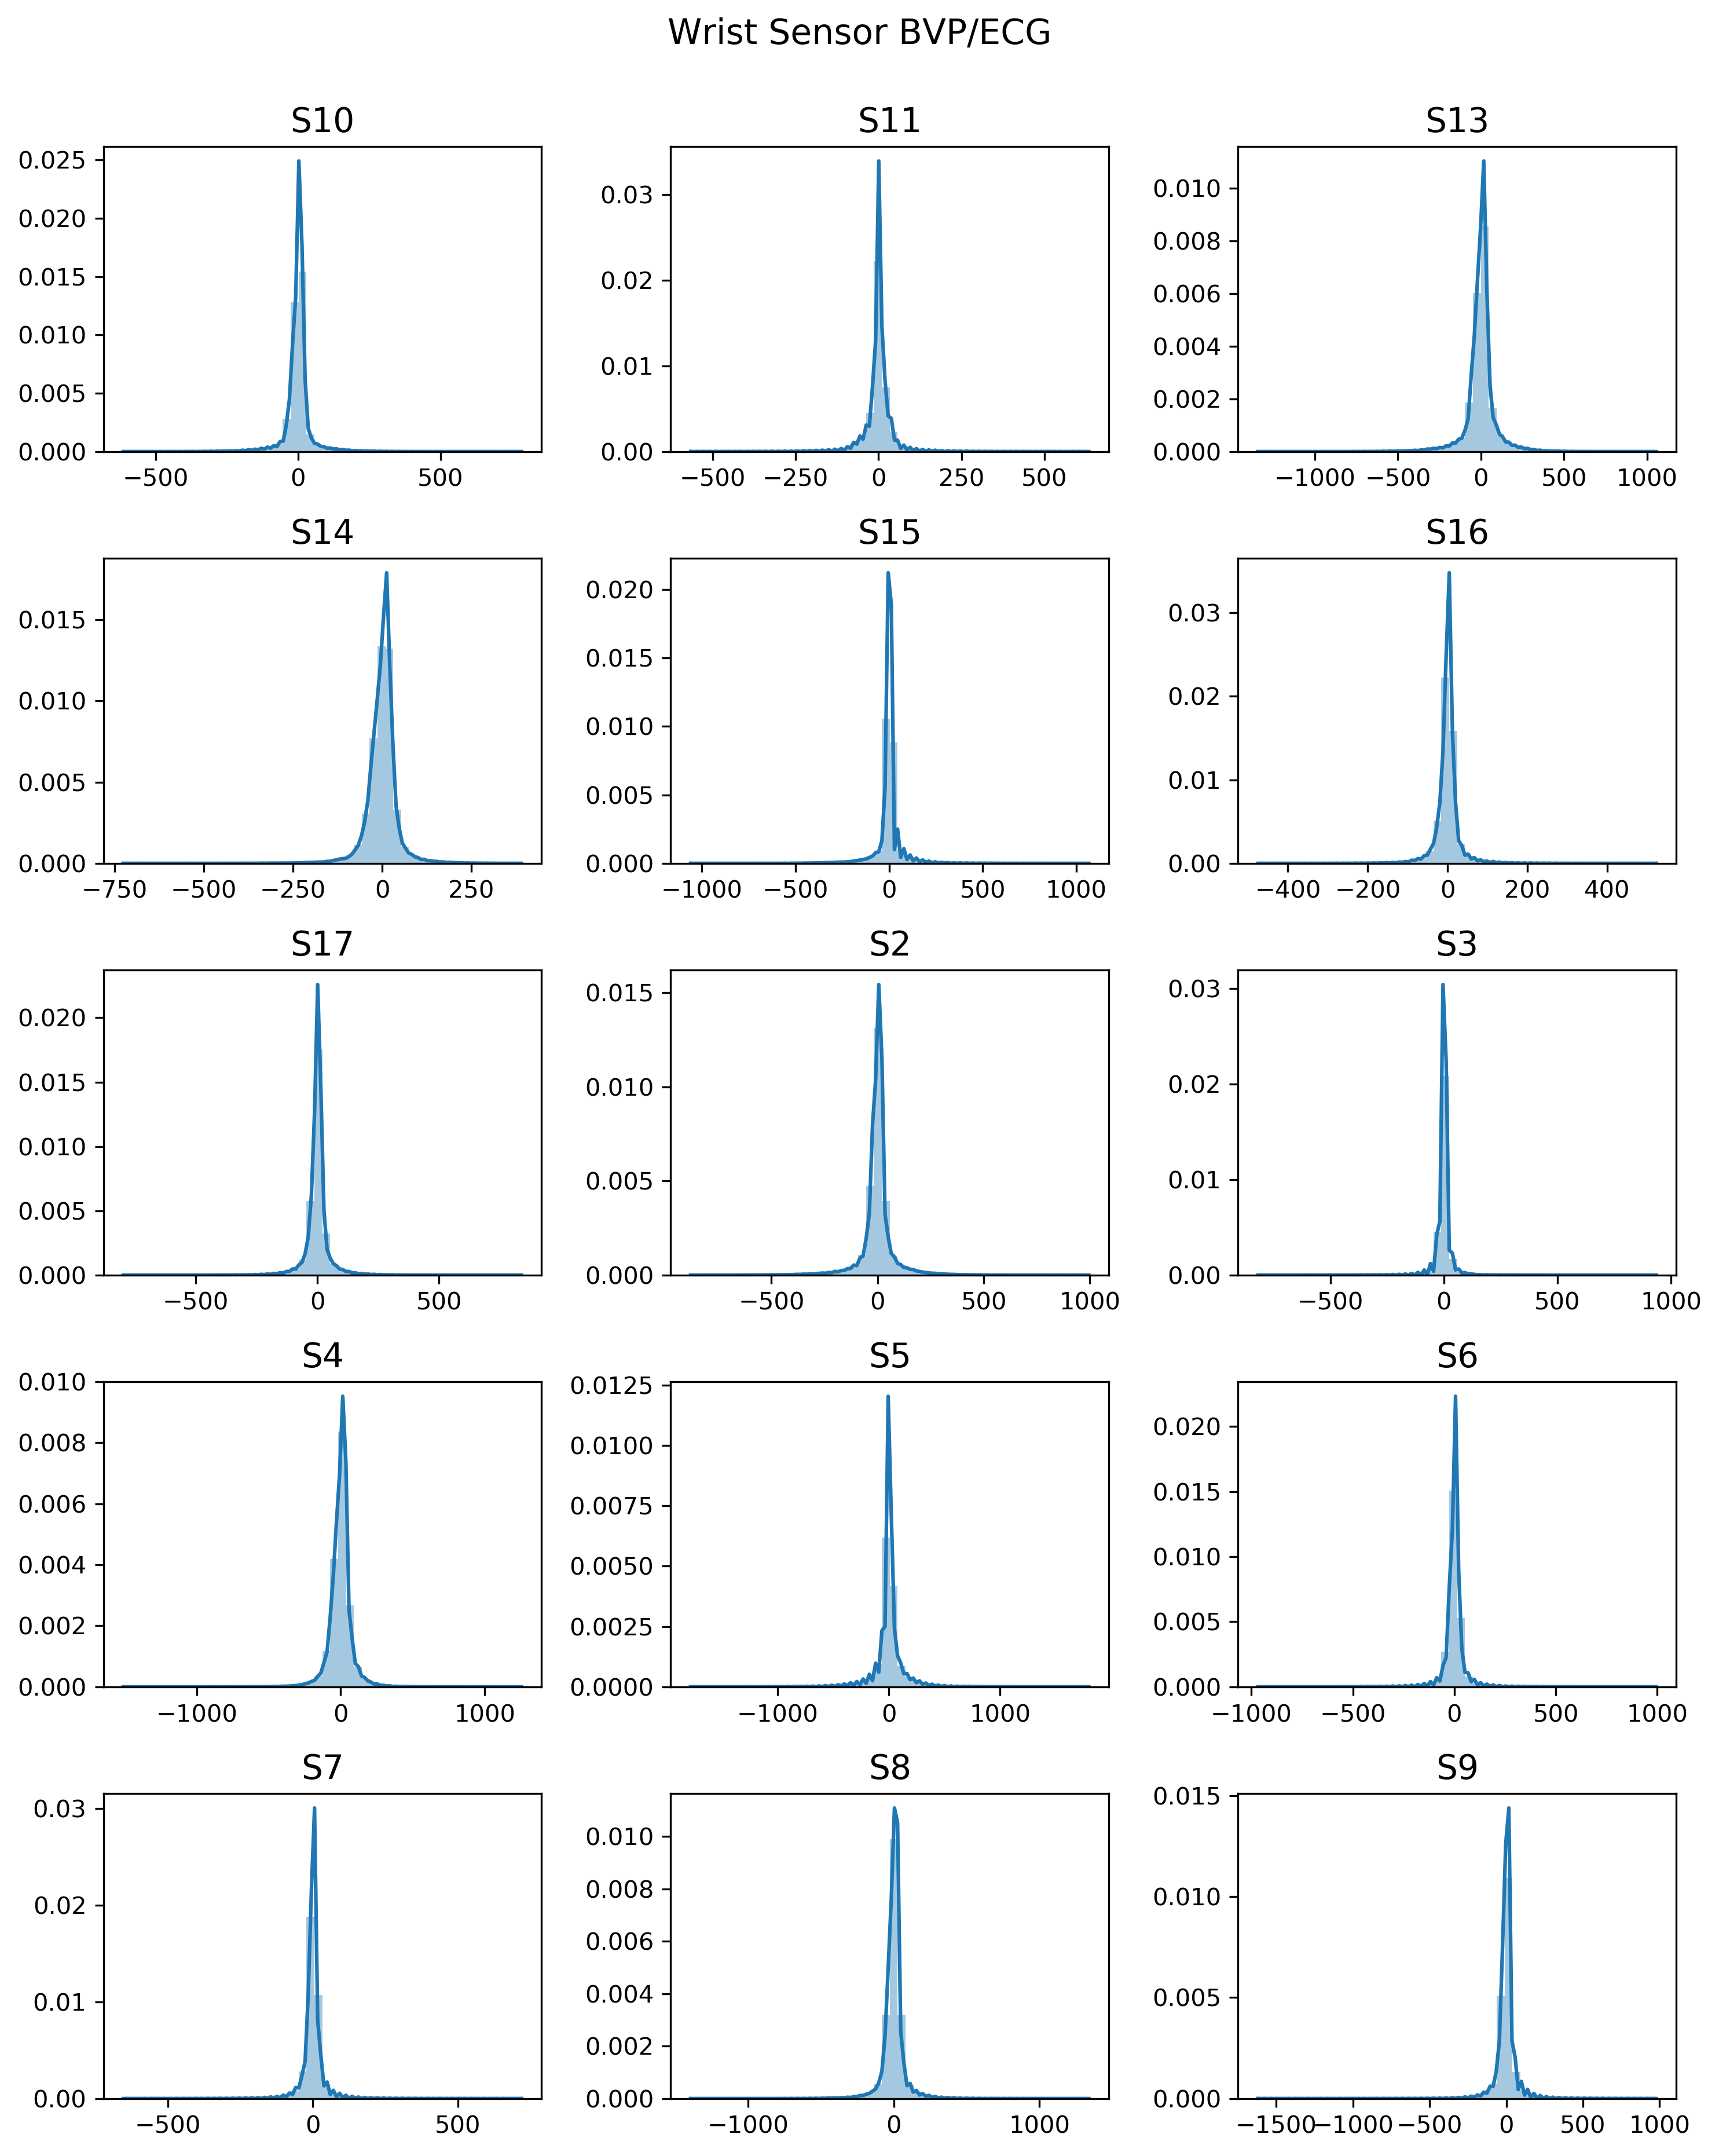

In [26]:
dist_plot('signal','wrist', 'BVP', 'Wrist Sensor BVP/ECG')

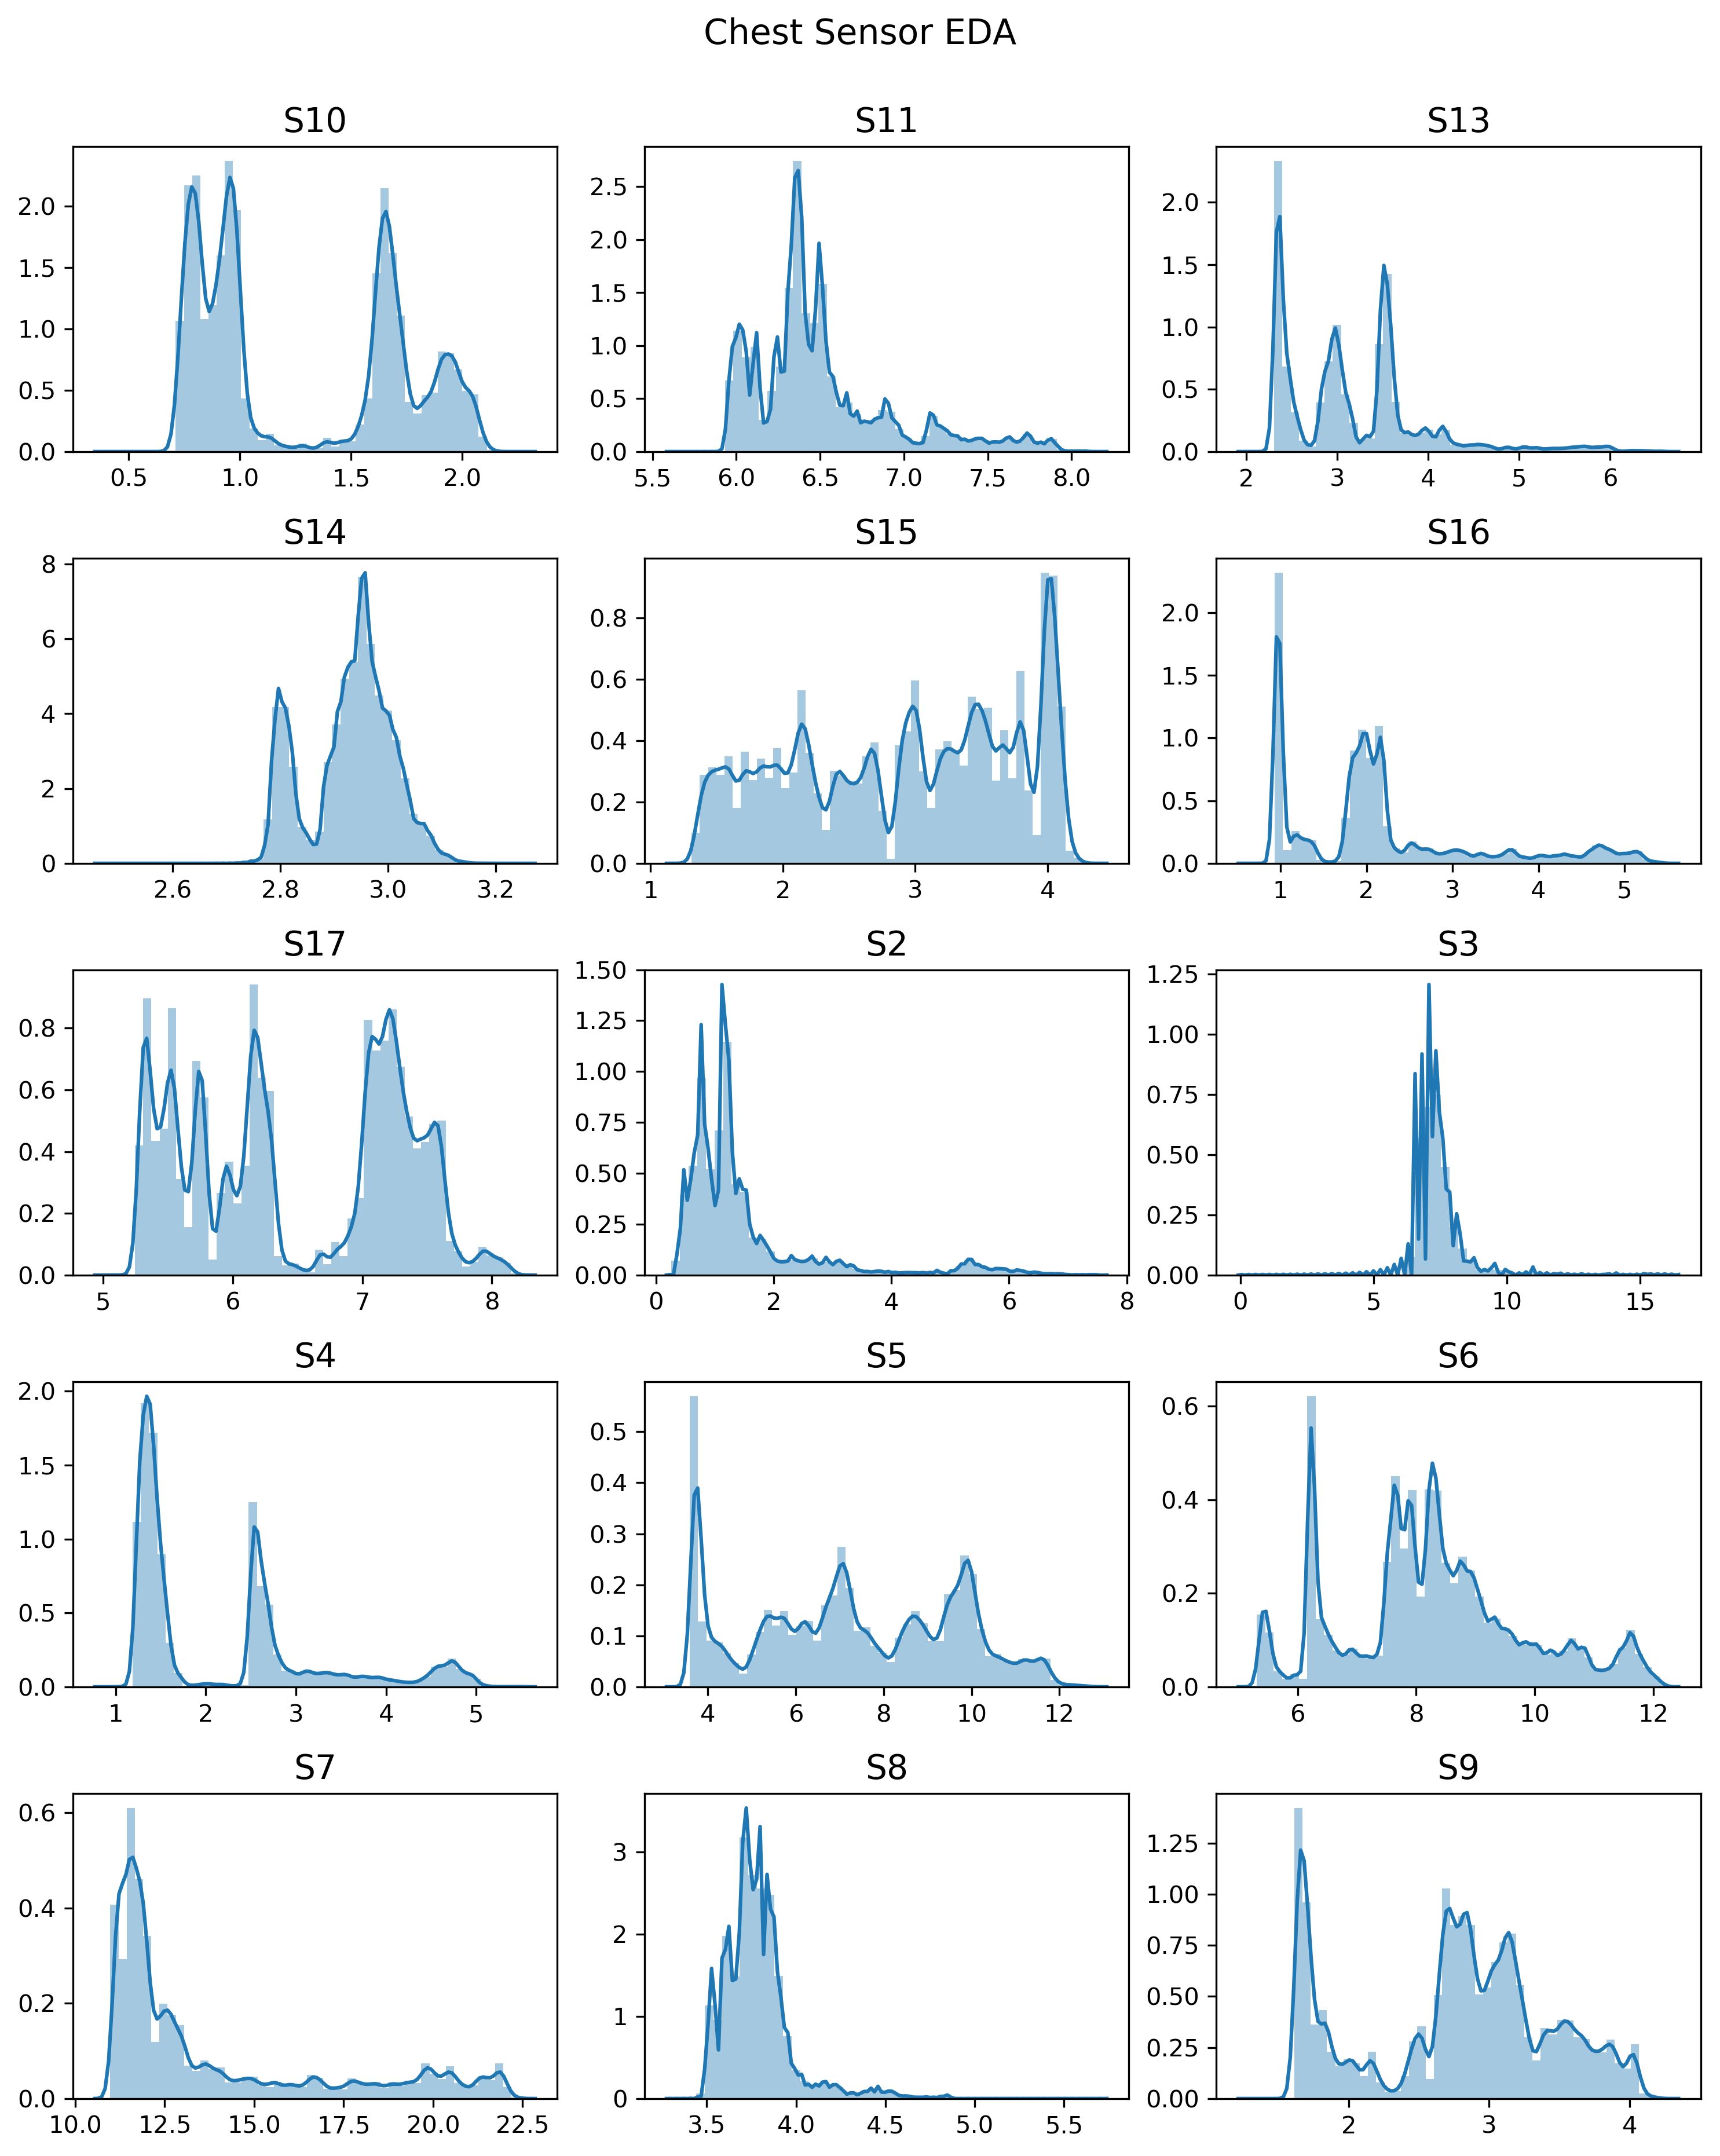

In [55]:
dist_plot('signal','chest', 'EDA', 'Chest Sensor EDA')

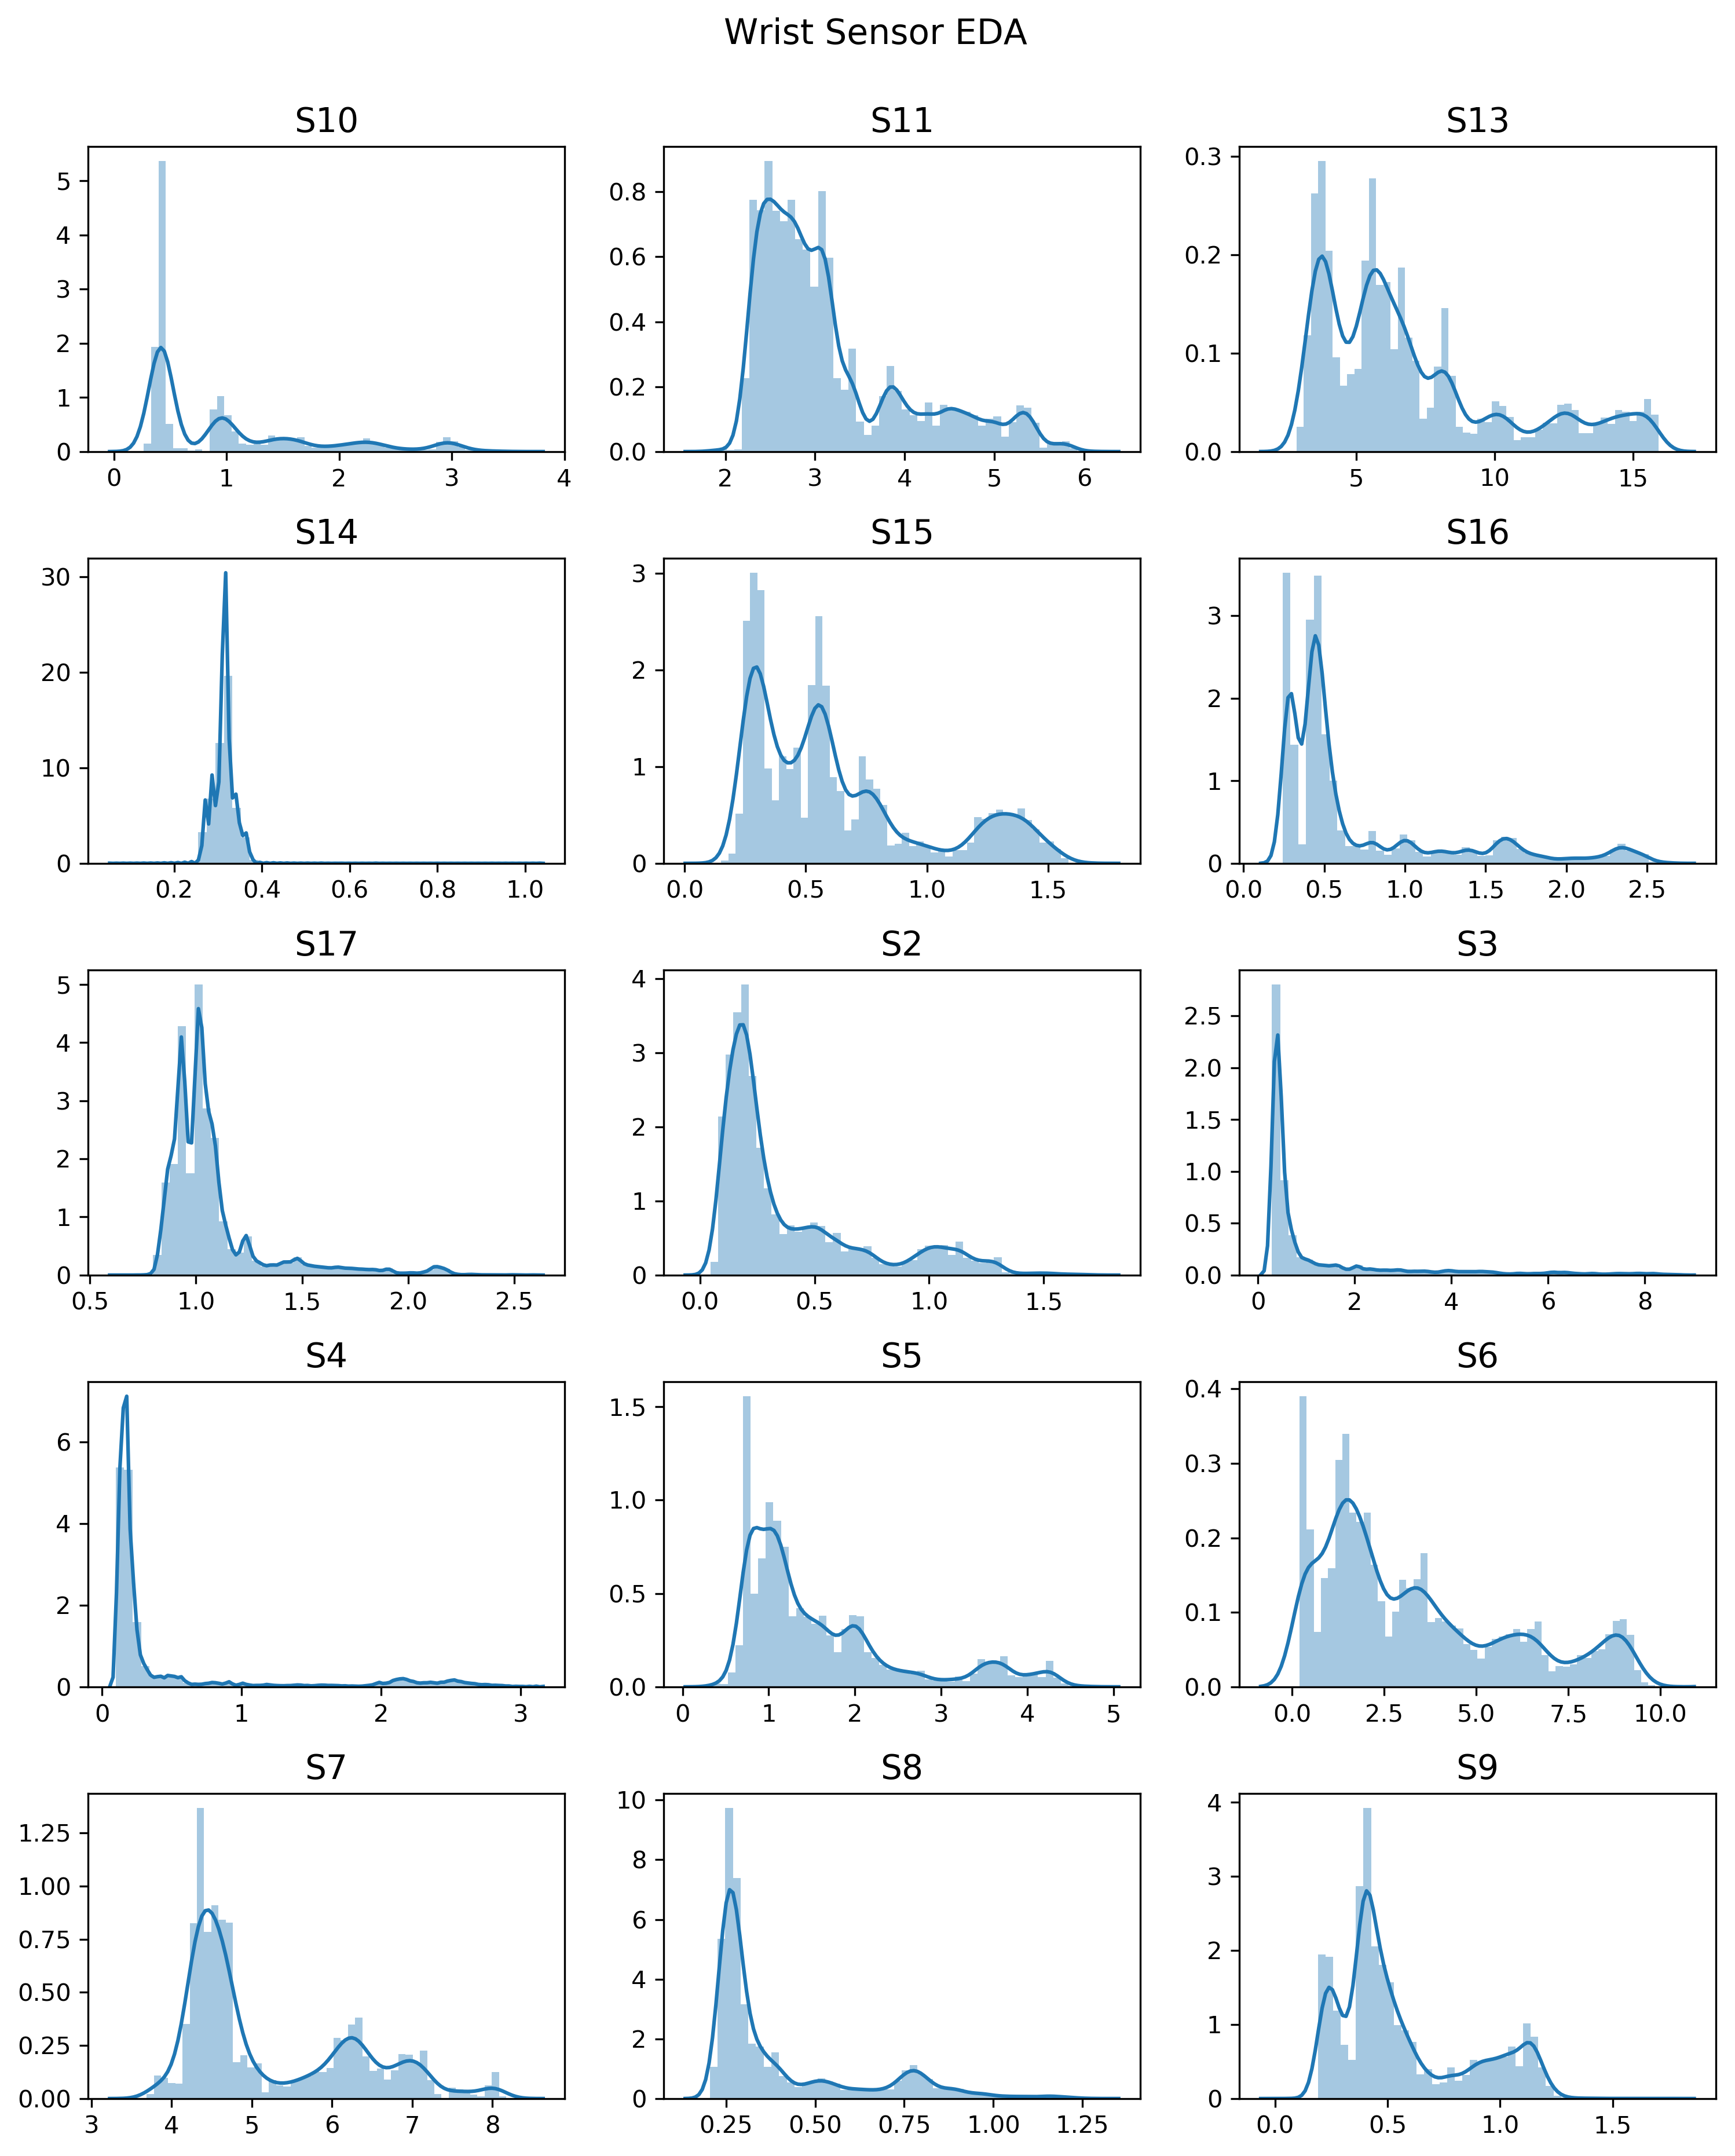

In [56]:
dist_plot('signal','wrist', 'EDA', 'Wrist Sensor EDA')

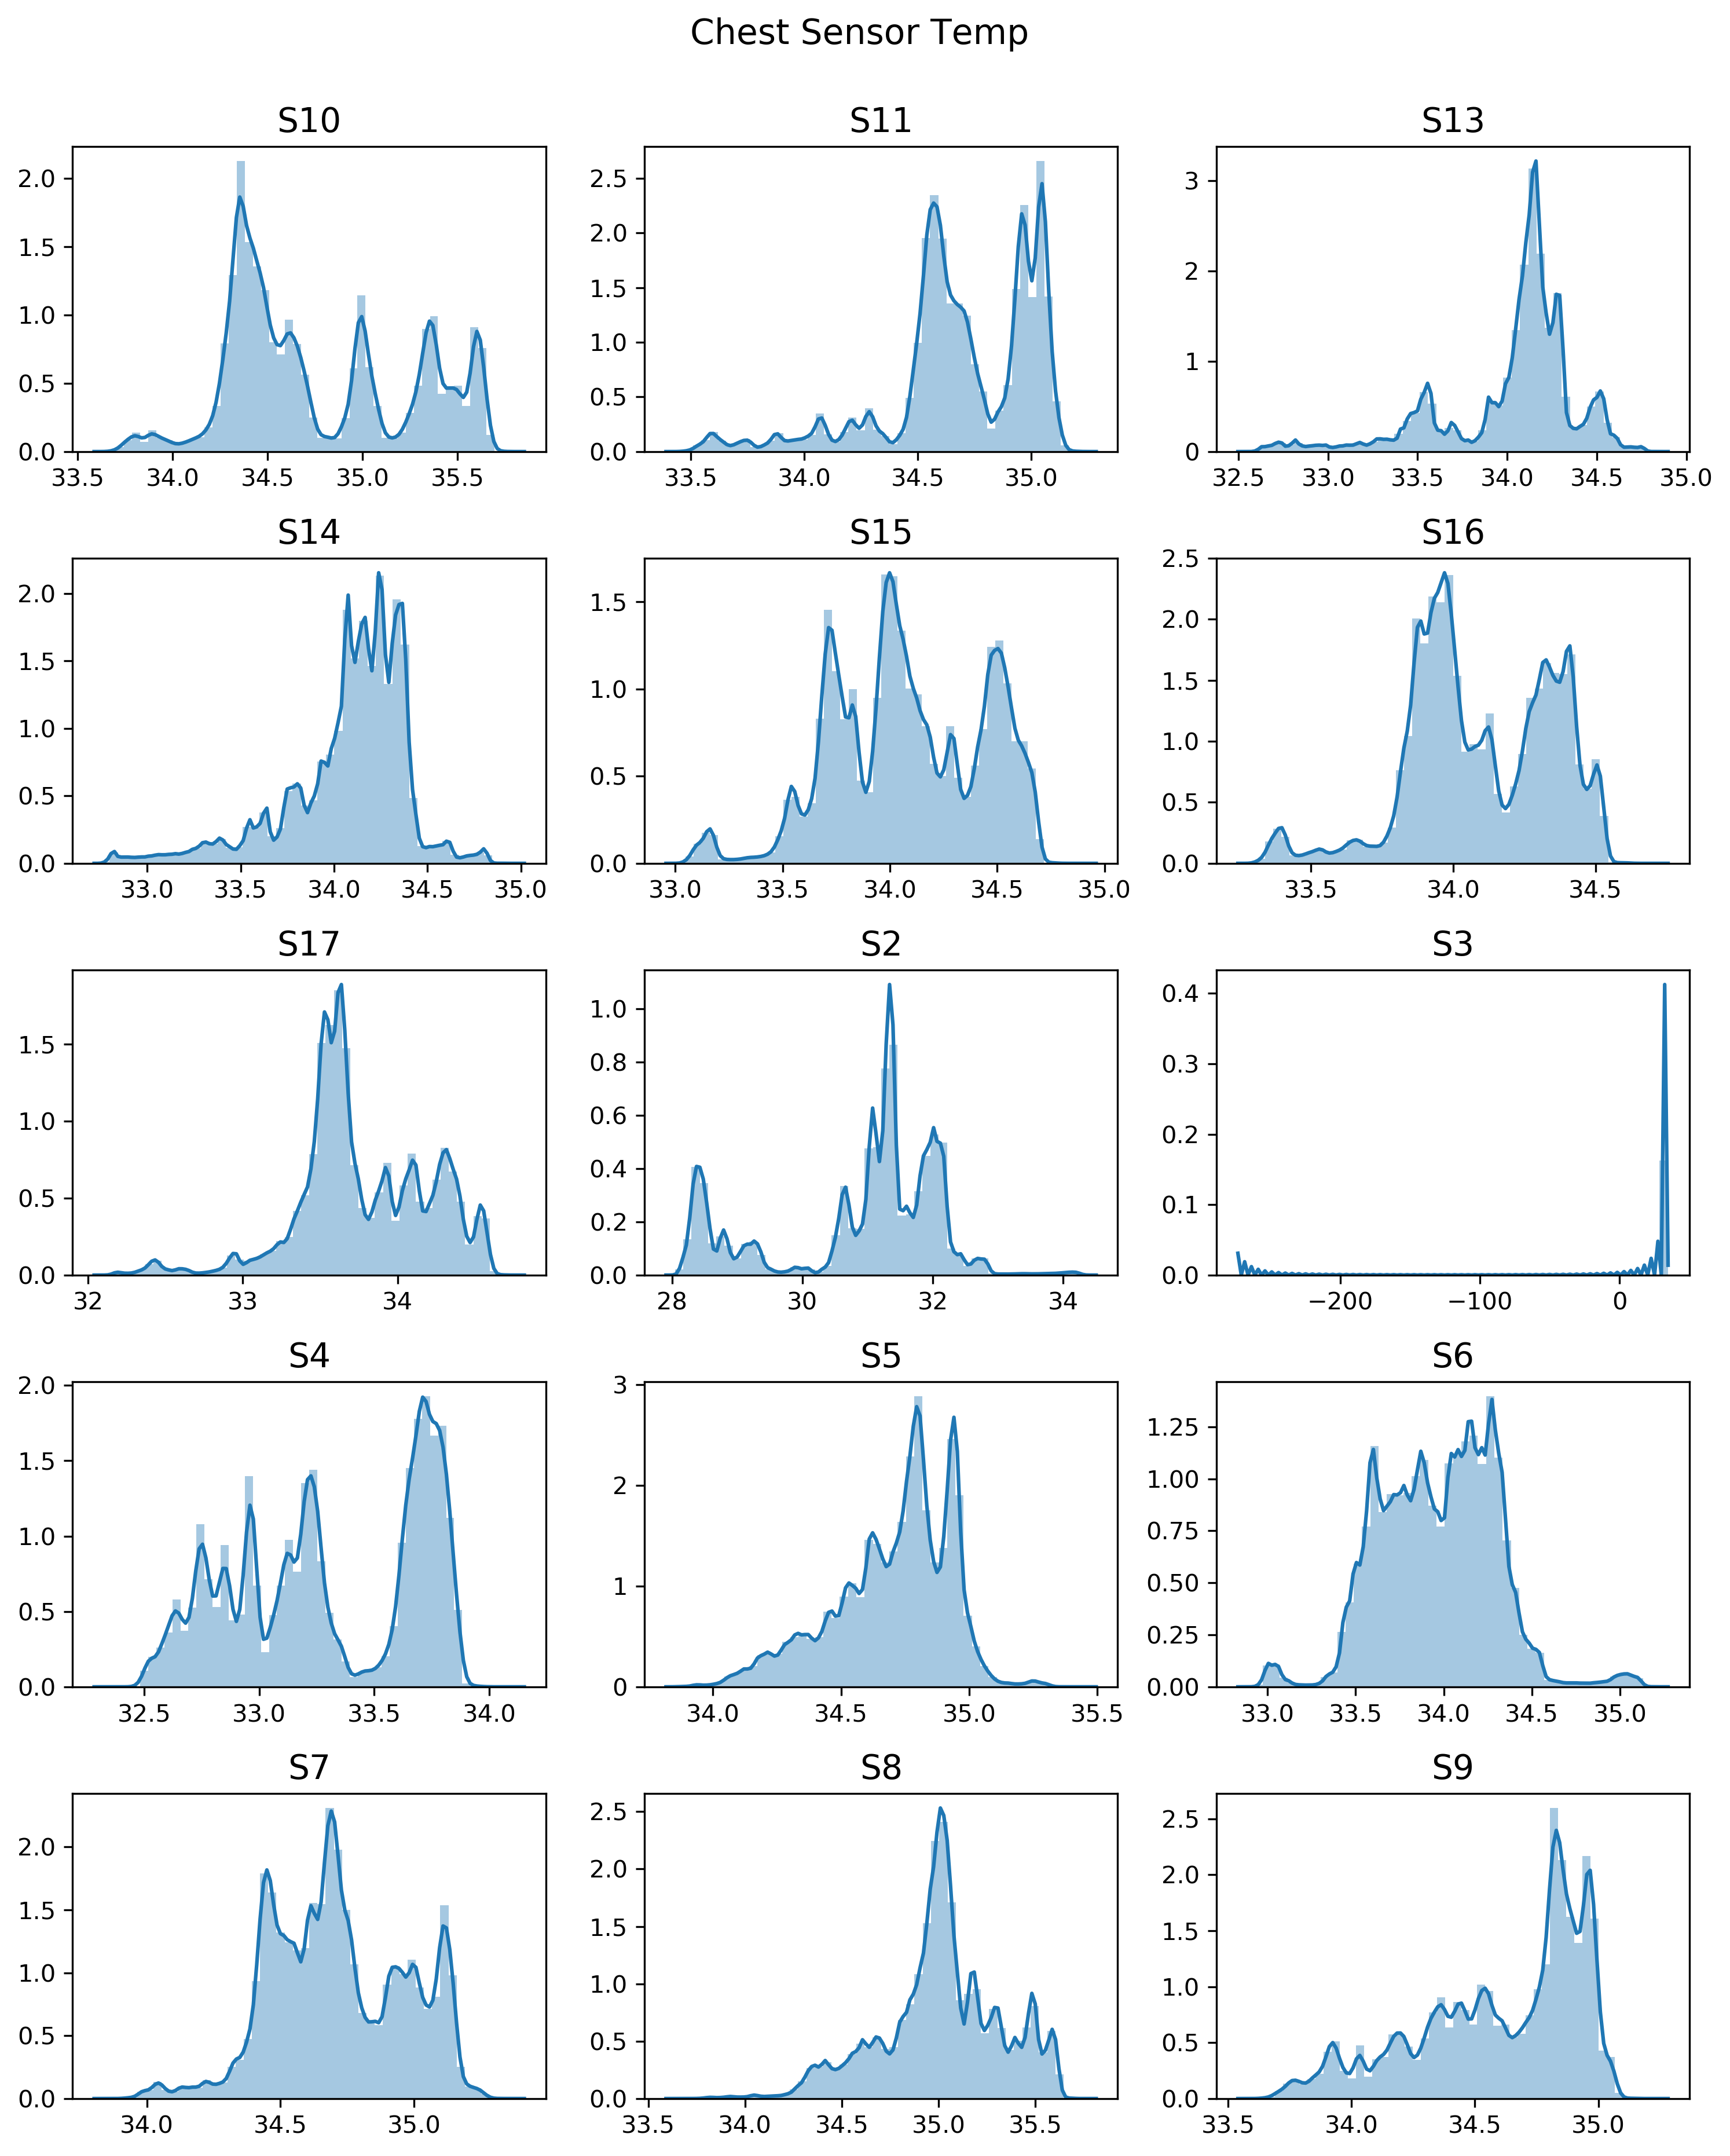

In [57]:
dist_plot('signal','chest', 'Temp', 'Chest Sensor Temp')

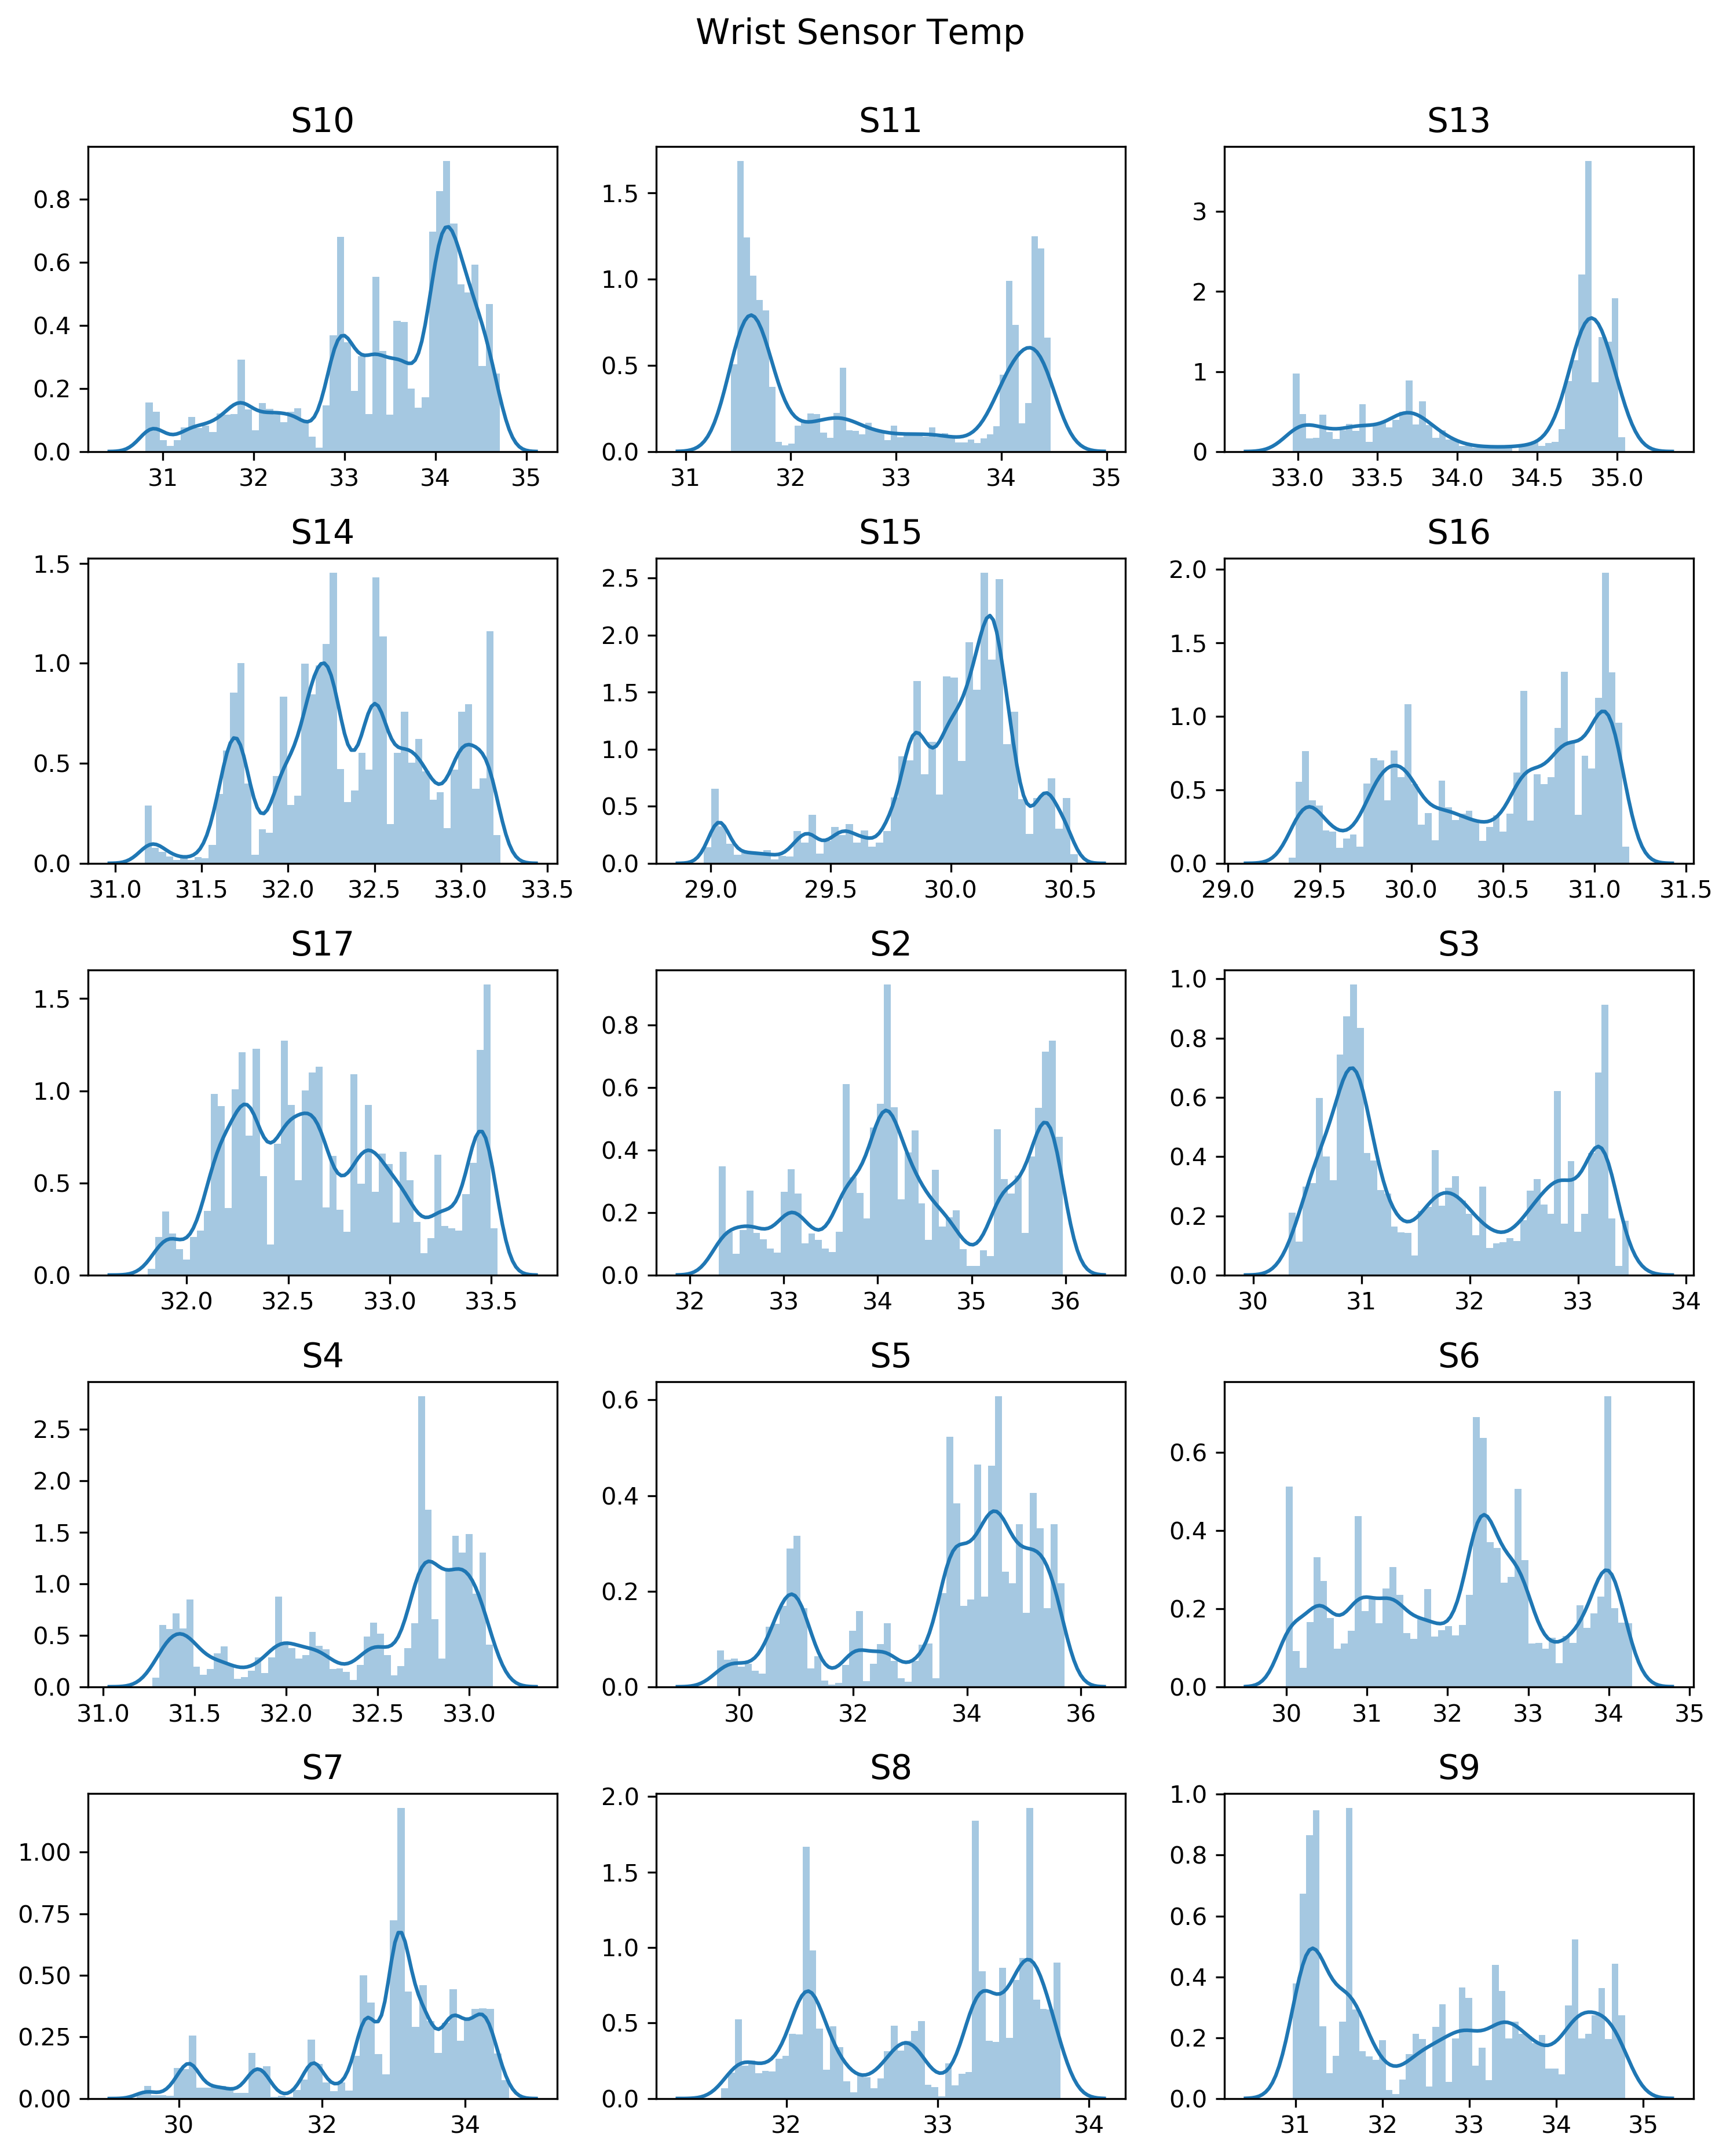

In [58]:
dist_plot('signal','wrist', 'TEMP', 'Wrist Sensor Temp')

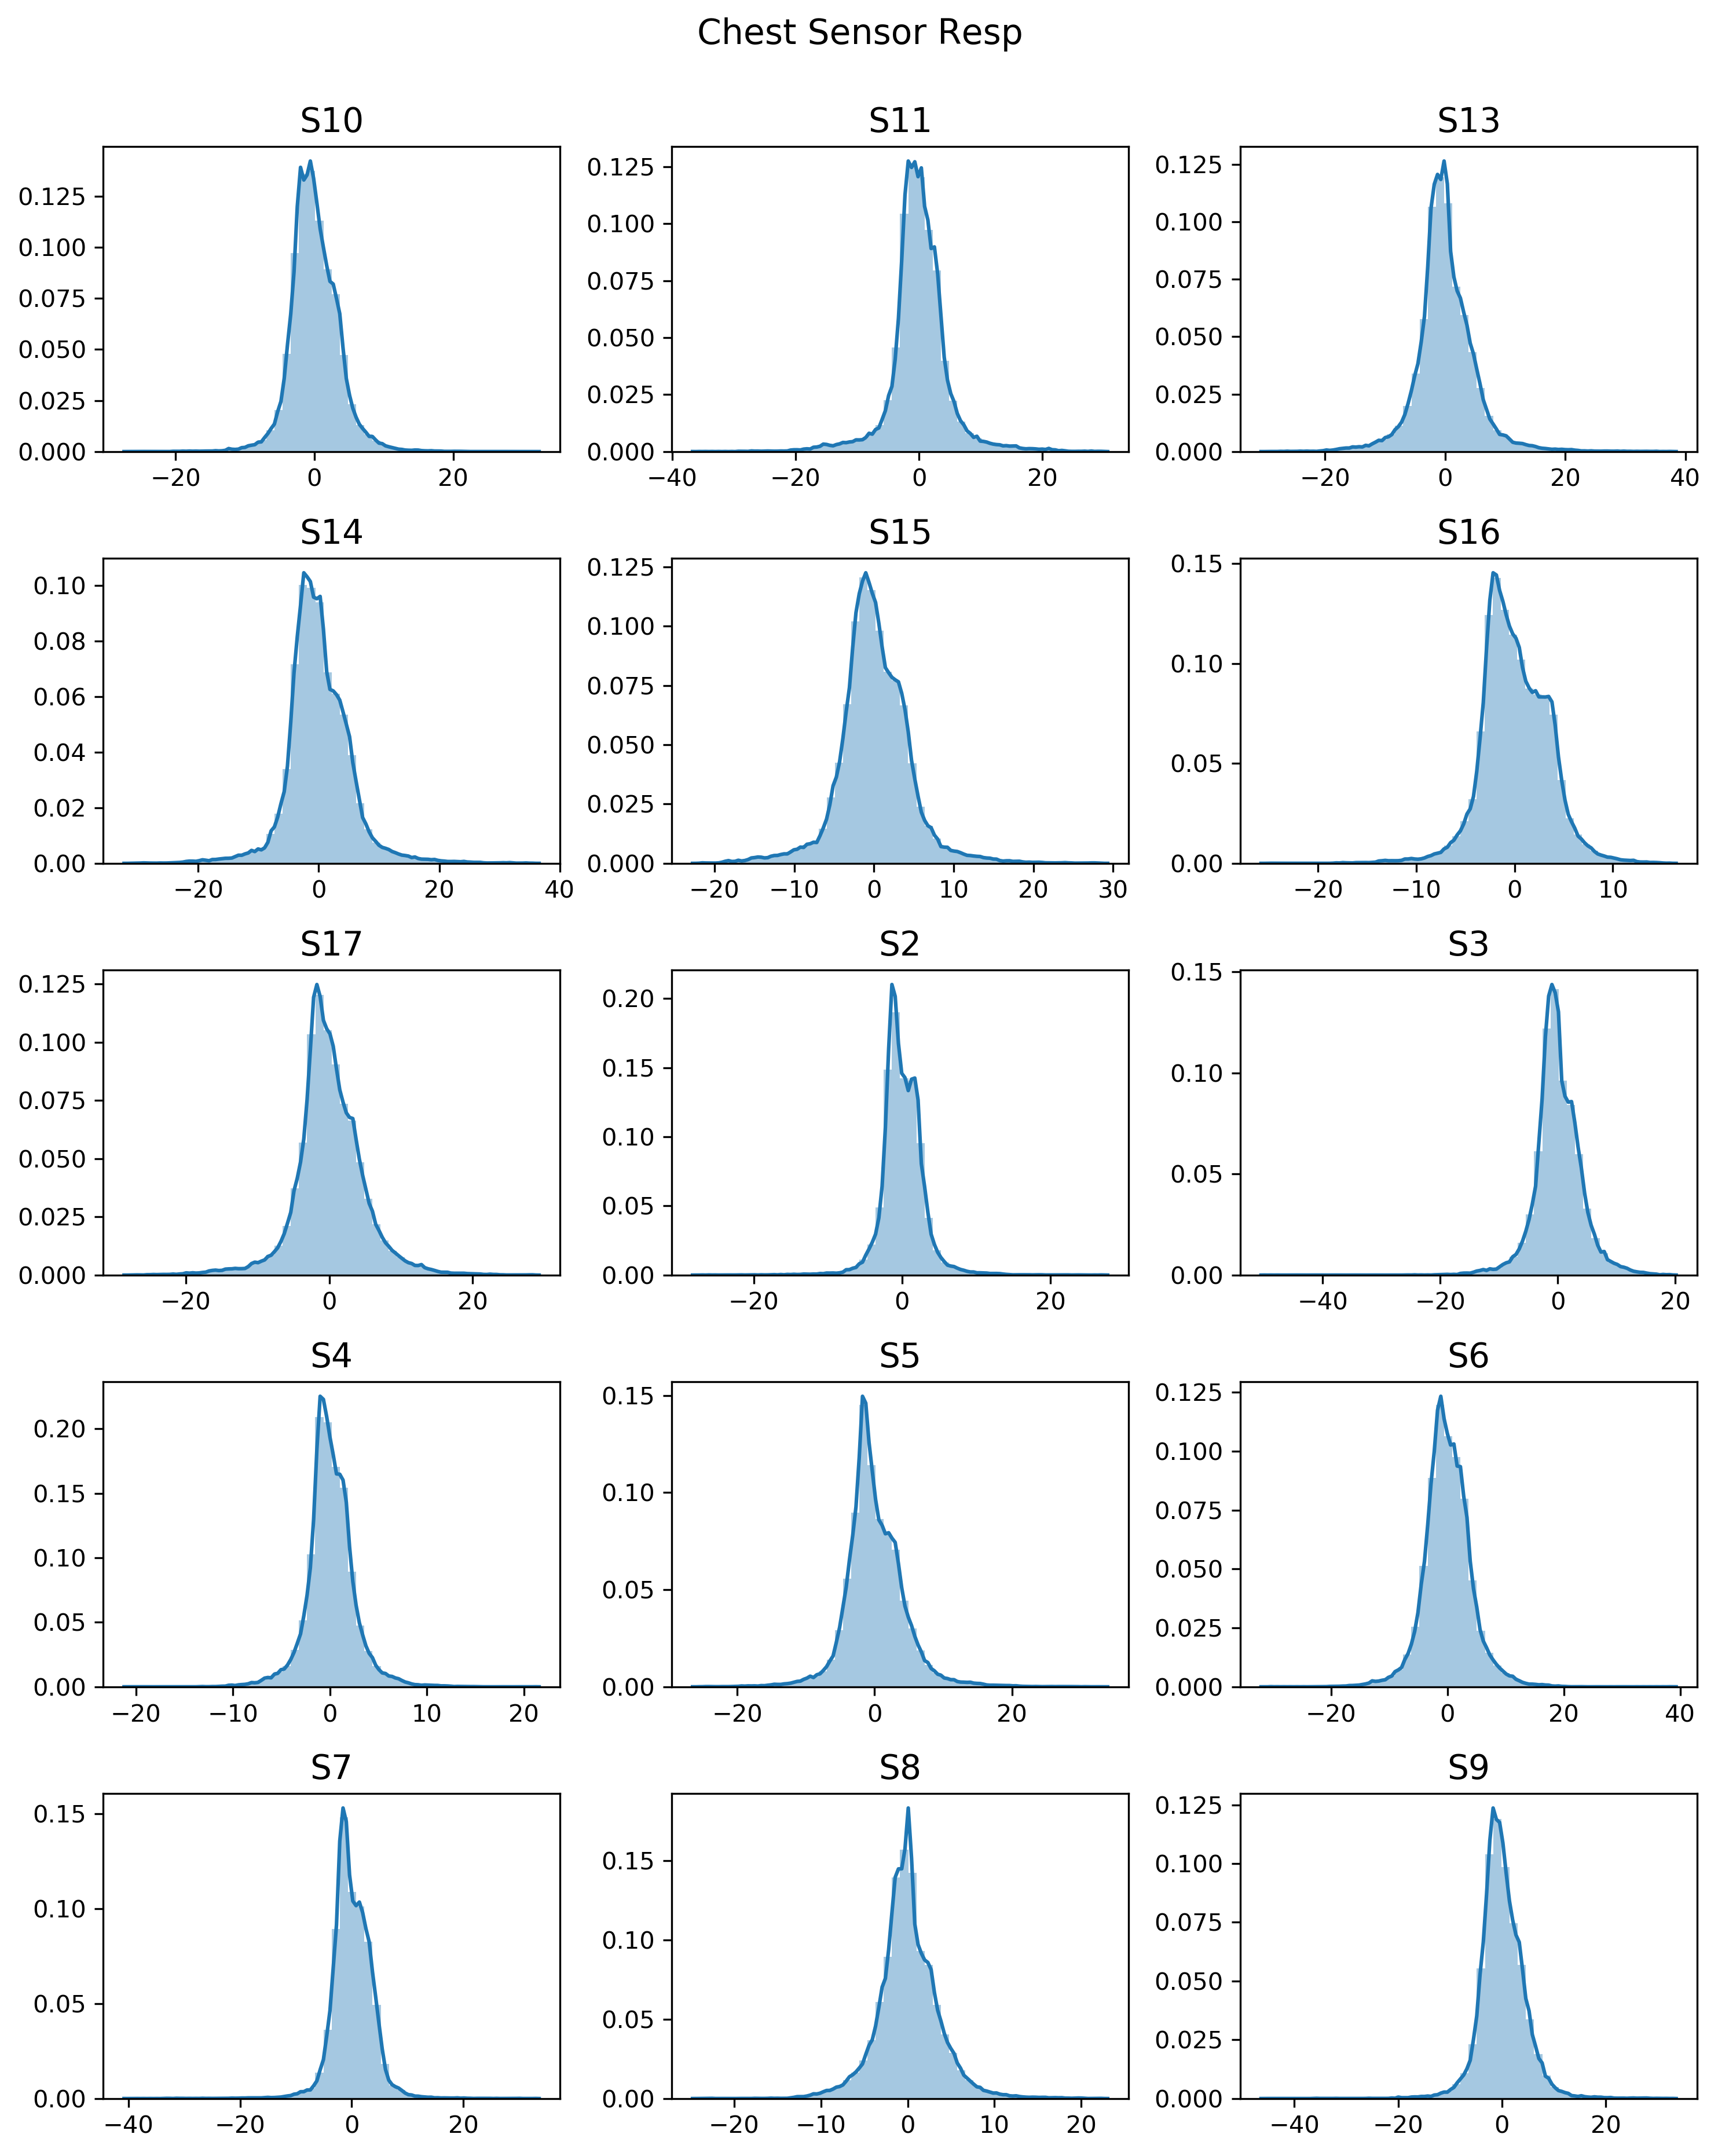

In [62]:
dist_plot('signal','chest', 'Resp', 'Chest Sensor Resp')

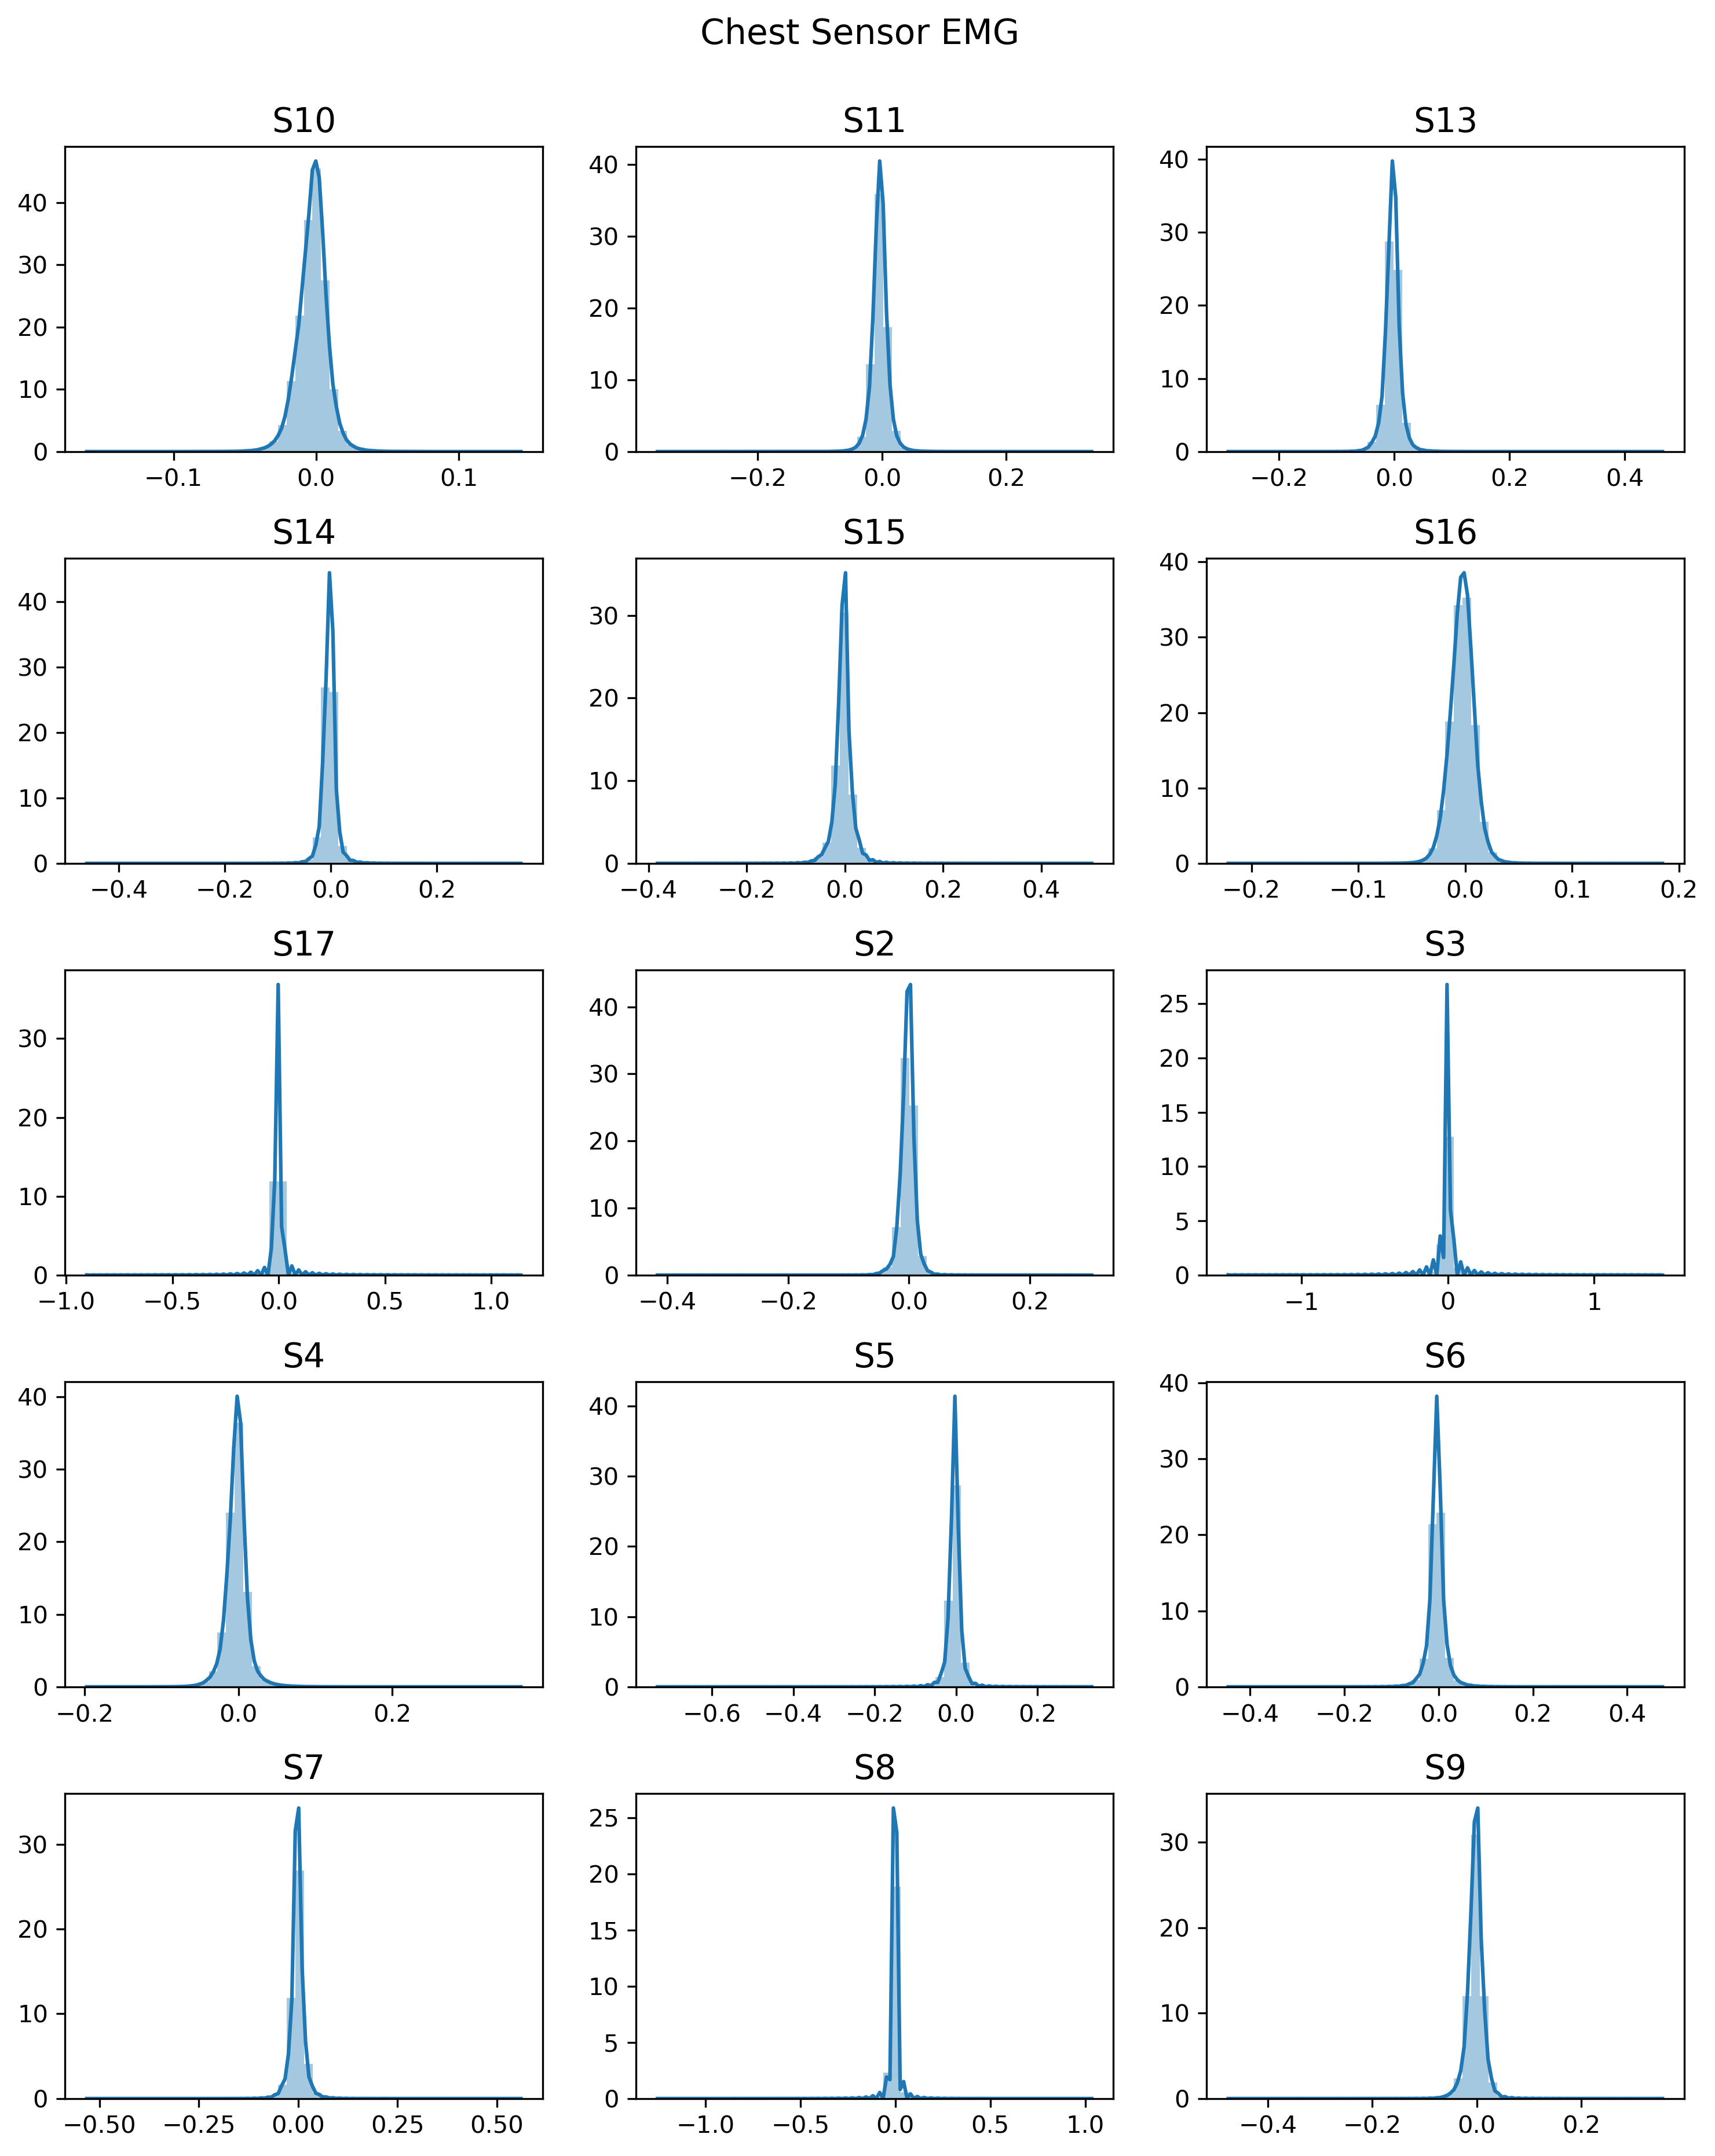

In [63]:
dist_plot('signal','chest', 'EMG', 'Chest Sensor EMG')

In [60]:
def dist_ACC(signal = 'None', signal2 = 'None', signal3 = 'ACC', title = 'None', channel= int):
    """
    @signal: str, indicates the features choose from [signal] 
    @signal2: str, indicates the device, choose from [chest, wrist]
    @signal3: str, indicates the sensor data, choose from name of sensors
    @channel: int, indicates the dimmension of the acceleration in the direction of x, y, z, choose from [0, 1, 2]
    @does: plot the distributions of the features
    @returns: plots
    """
    keys = list(fileDic.keys())
    coordinates = [[i,j] for i in range(5) for j in range(3)]
    fig, axs = plt.subplots(5, 3, figsize = (10,12), dpi =300)
    st = fig.suptitle(title, fontsize="x-large")
    st.set_y(1.03)
    fig.subplots_adjust(top=0.85)

    for key, axes in zip(keys, coordinates):
        sns.distplot(fileDic[key][signal][signal2][signal3][:,channel], bins = 50, ax = axs[axes[0], axes[1]])
        axs[axes[0], axes[1]].set_title(key , fontsize =14)

    fig.tight_layout()

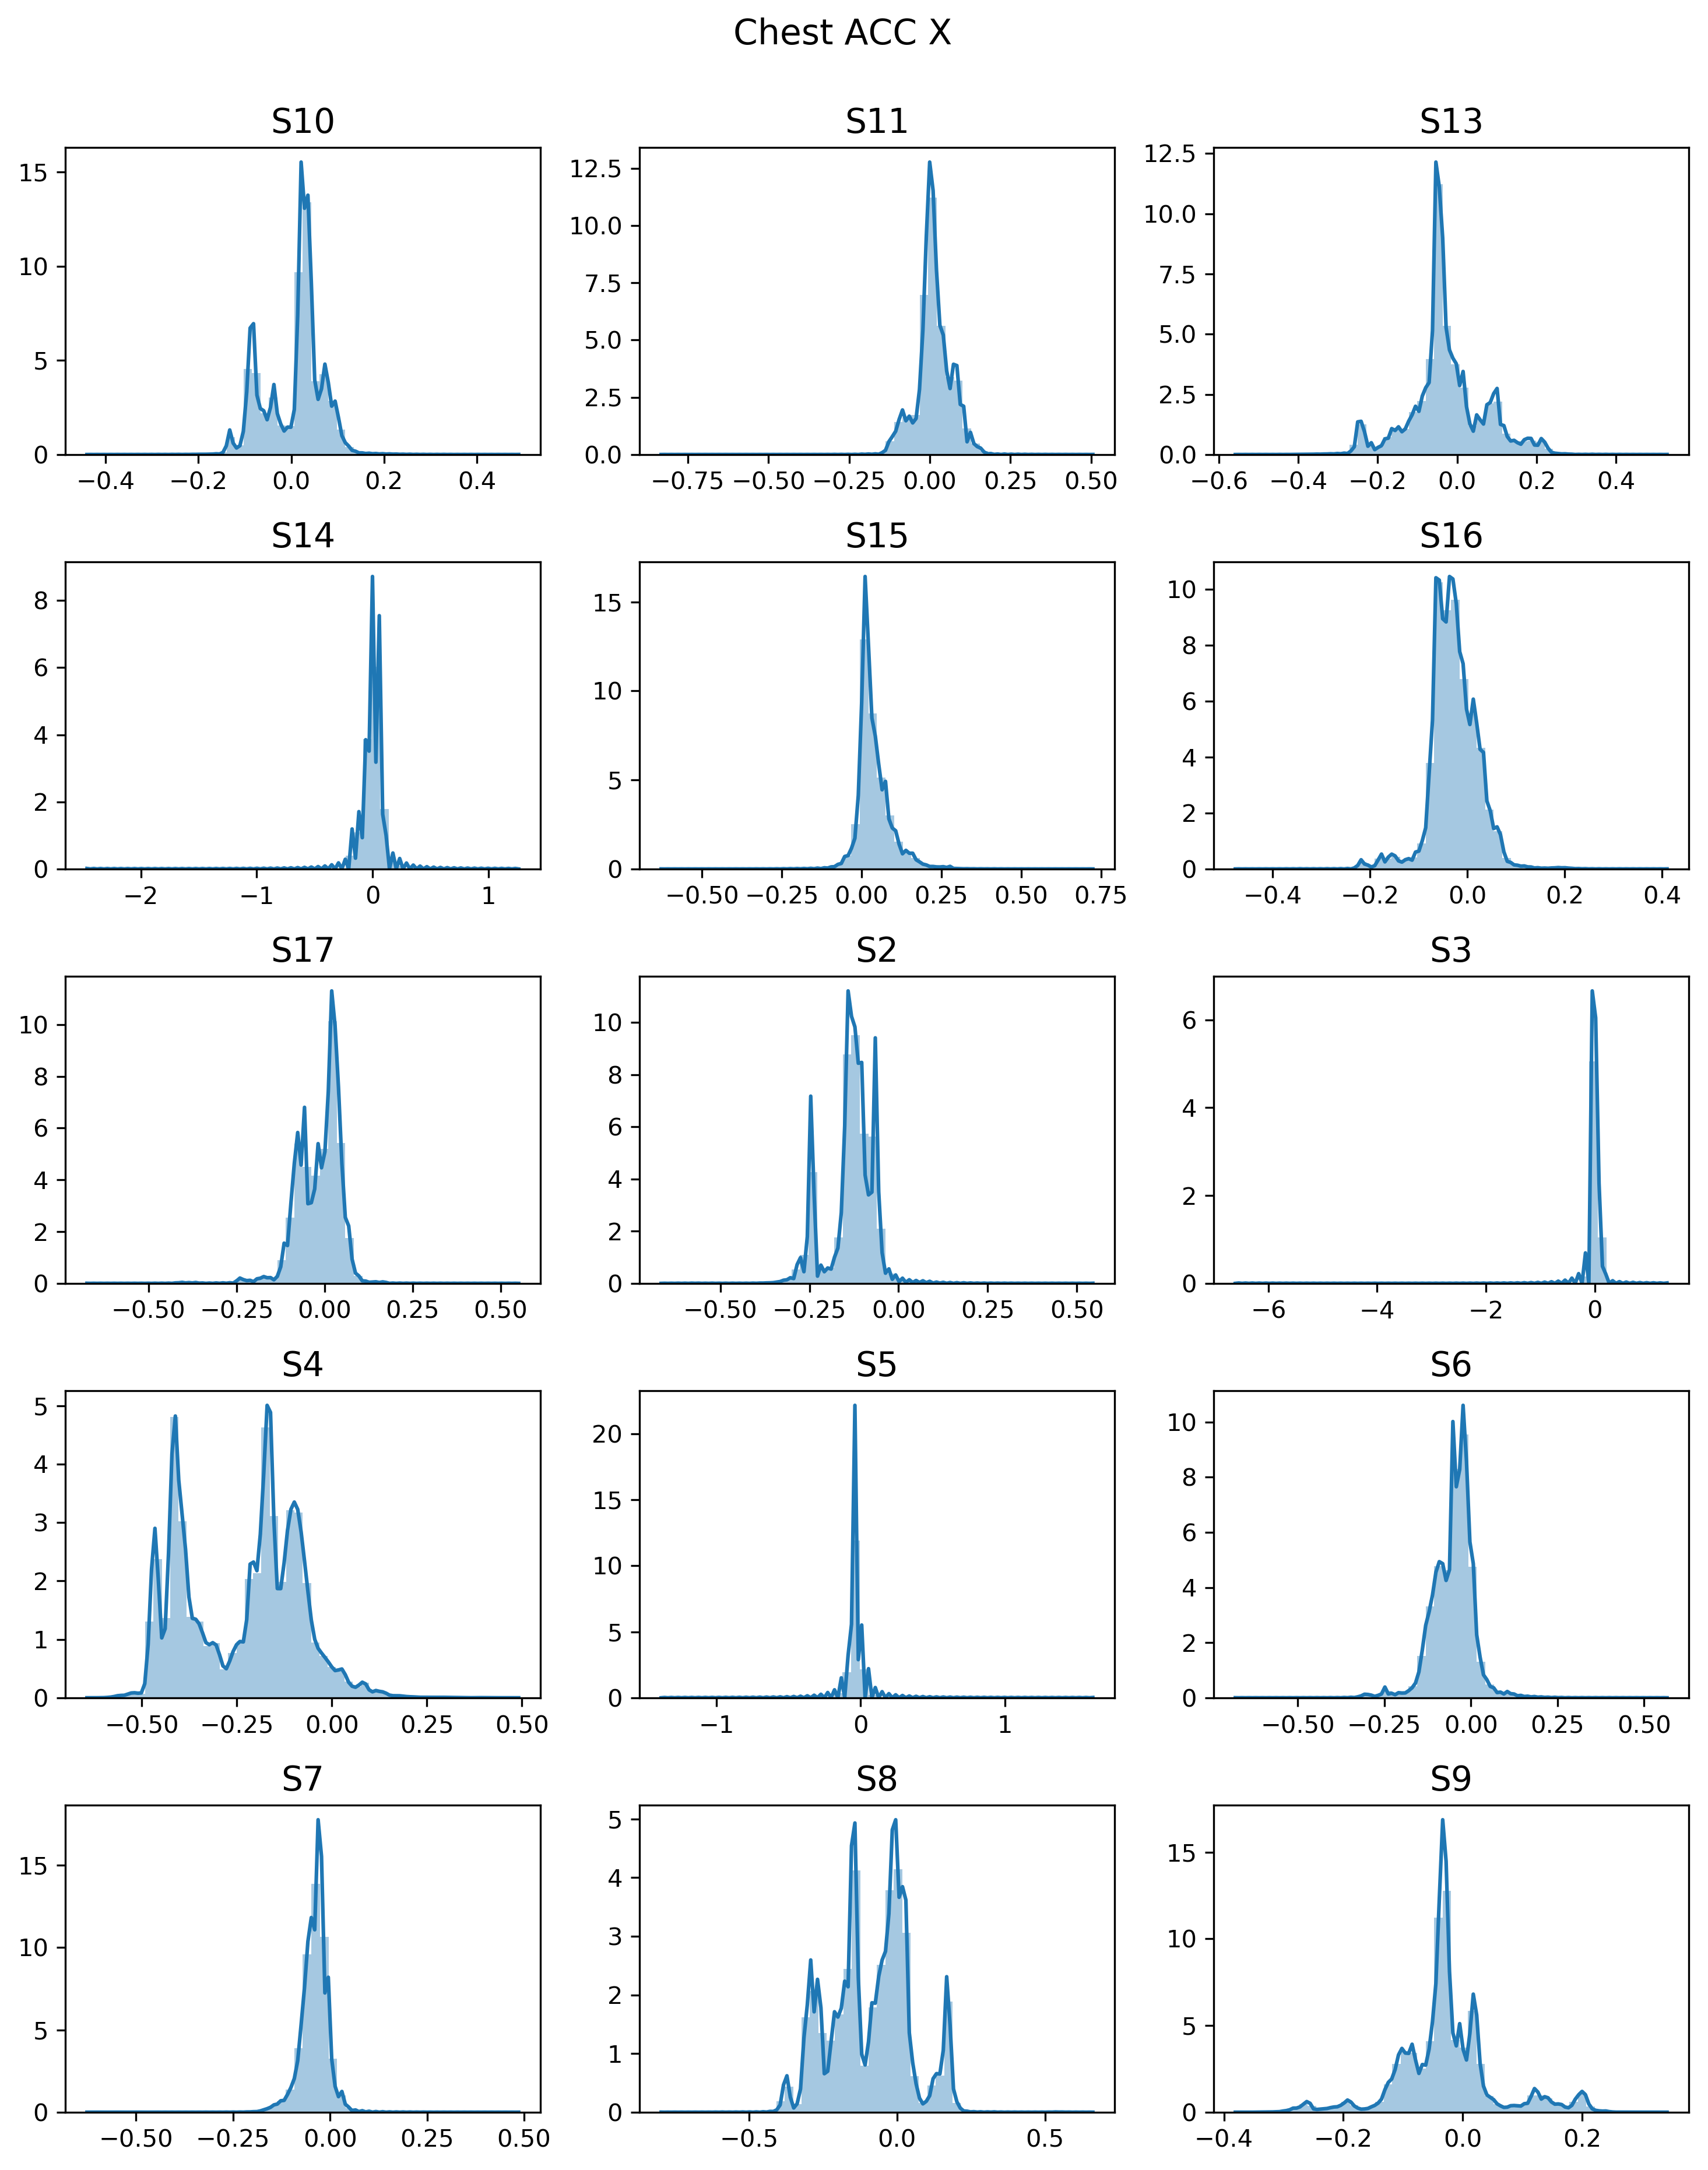

In [61]:
dist_ACC('signal', 'chest', 'ACC', 'Chest ACC X', channel=1)

In [68]:
def dist_label(signal = 'None'):
    """
    @signal: str, indicates the labels choose from [label] 
    @does: plot the distributions of the features
    @returns: plots
    """
    keys = list(fileDic.keys())
    coordinates = [[i,j] for i in range(5) for j in range(3)]
    fig, axs = plt.subplots(5, 3, figsize = (10,12), dpi =300)
    st = fig.suptitle('Label', fontsize="x-large")
    st.set_y(1.03)
    fig.subplots_adjust(top=0.85)

    for key, axes in zip(keys, coordinates):
        sns.distplot(fileDic[key][signal], bins = 50, ax = axs[axes[0], axes[1]], kde =False)
        axs[axes[0], axes[1]].set_title(key , fontsize =14)

    fig.tight_layout()

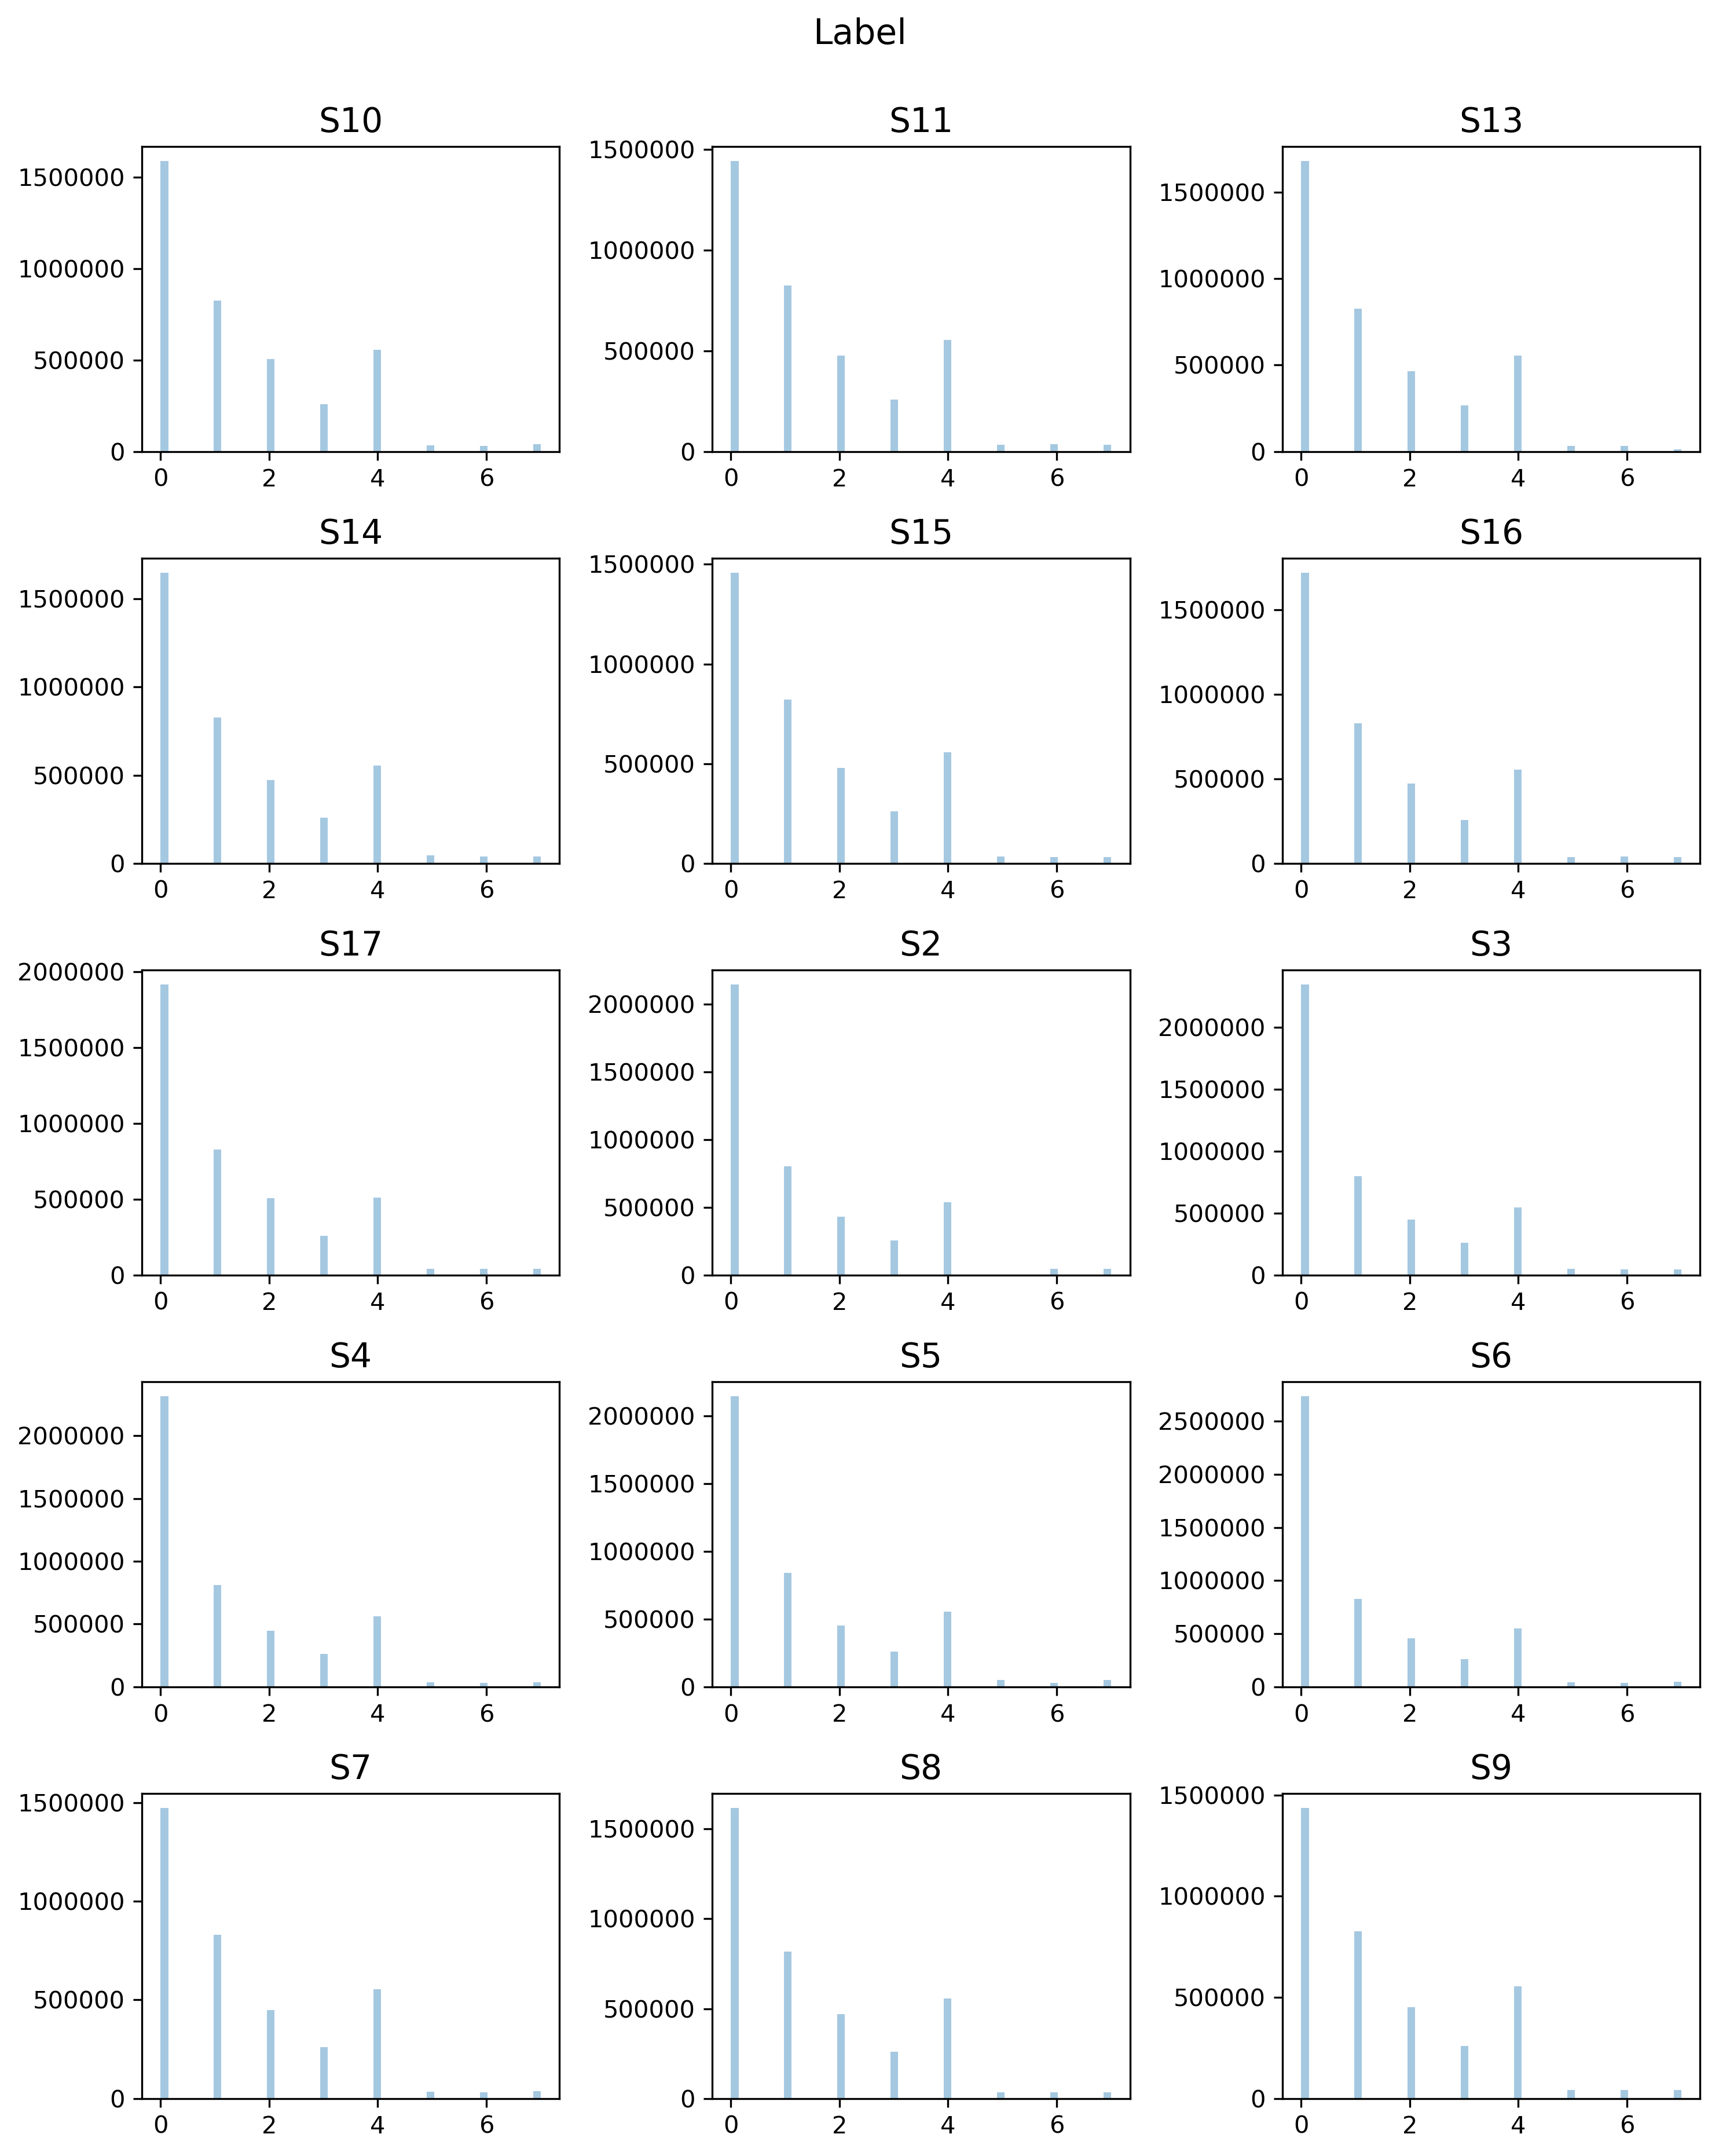

In [69]:
dist_label('label')

In [39]:
len(fileDic['S2']['signal']['chest']['ACC'])

4255300

In [40]:
len(fileDic['S2']['signal']['wrist']['ACC'])

194528

In [31]:
len(fileDic['S10']['signal']['wrist']['BVP'])/3847200

# technically the sliding window we use for the high freg signal * ratio (h freq/l freq) should be used for the low freq signal

0.09142857142857143

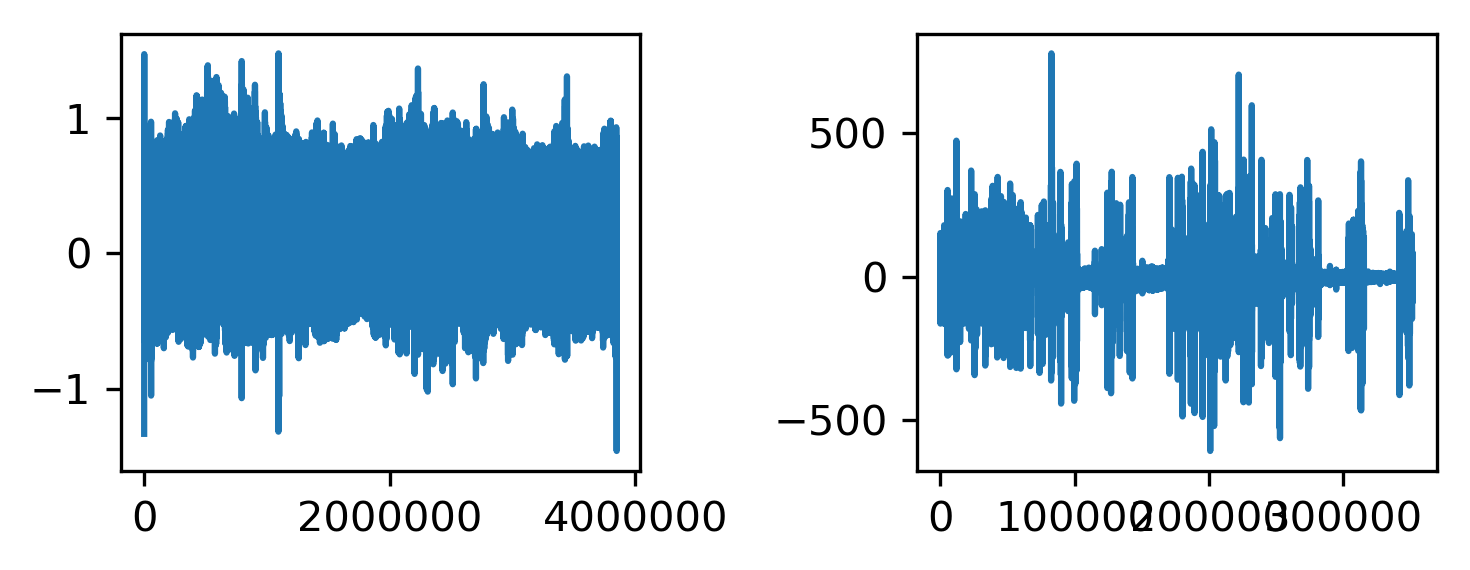

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (5,2), dpi =300)
axs[0].plot(fileDic['S10']['signal']['chest']['ECG'])
axs[1].plot(fileDic['S10']['signal']['wrist']['BVP'])
fig.tight_layout()

In [50]:
fileDic['S10']

{'signal': {'chest': {'ACC': array([[ 1.12779999,  0.15199995,  0.34159994],
          [ 1.09319997,  0.18879998,  0.29219997],
          [ 1.03539991,  0.20940006,  0.18579996],
          ...,
          [ 0.89419997,  0.03380001, -0.21460003],
          [ 0.89499998,  0.03419995, -0.21820003],
          [ 0.89639997,  0.03260005, -0.22140002]]),
   'ECG': array([[-1.33369446],
          [-1.32774353],
          [-1.32206726],
          ...,
          [ 0.53050232],
          [ 0.53375244],
          [ 0.54057312]]),
   'EMG': array([[-0.01368713],
          [-0.02192688],
          [-0.00901794],
          ...,
          [ 0.00654602],
          [-0.00141907],
          [-0.00814819]]),
   'EDA': array([[0.71601868],
          [0.7144928 ],
          [0.71563721],
          ...,
          [1.70440674],
          [1.74827576],
          [1.72462463]]),
   'Temp': array([[33.69586 ],
          [33.741333],
          [33.71707 ],
          ...,
          [35.020447],
          [34.932495

In [1]:
import tensorflow as tf

C:\Users\abdollahinamin.a\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

2.0.0


In [12]:
!pip3 install --upgrade tensorflow --user

Requirement already up-to-date: tensorflow in c:\users\abdollahinamin.a\appdata\roaming\python\python36\site-packages (2.0.0)


In [29]:
sub_ch_ecg = fileDic['S2']['signal']['chest']['ECG'][0:4000]
sub_wr_ecg = fileDic['S2']['signal']['wrist']['BVP'][0:366]

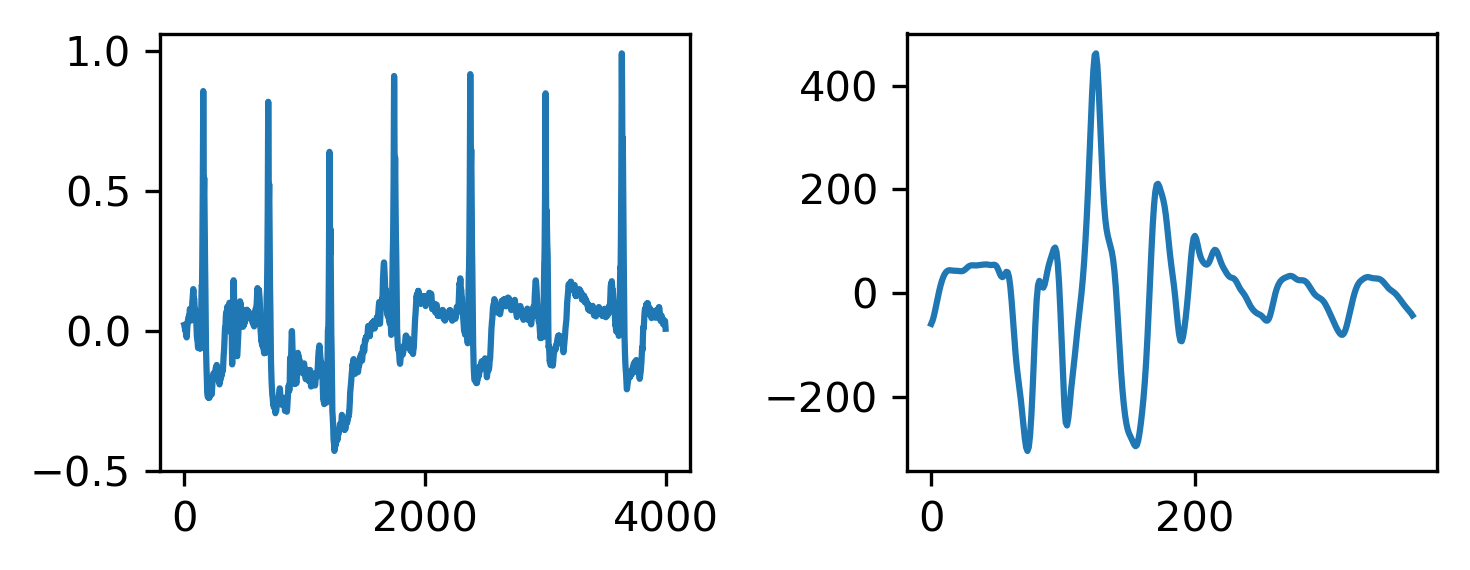

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (5,2), dpi =300)
axs[0].plot(sub_ch_ecg)
axs[1].plot(sub_wr_ecg)
fig.tight_layout()

In [ ]:
sub_ch_ecg = fileDic['S2']['signal']['chest']['ECG']